In [114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D


In [2]:
scaler = StandardScaler()
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

co_dataset = pd.read_csv('./datasets/CO-2015-2019.csv')
co_headers = co_dataset.iloc[0]
co_dataset  = pd.DataFrame(co_dataset.values[1:], columns = co_headers)

fdp_dataset = pd.read_csv('./datasets/FDP-2015-2019.csv')
fdp_headers = fdp_dataset.iloc[0]
fdp_dataset  = pd.DataFrame(fdp_dataset.values[1:], columns = fdp_headers)

no2_dataset = pd.read_csv('./datasets/NO2-2015-2019.csv')
no2_headers = no2_dataset.iloc[0]
no2_dataset  = pd.DataFrame(no2_dataset.values[1:], columns = no2_headers)

In [3]:
co_dataset.head()

,Date,Hour,Sofia-EEA Pavlovo,Sofia - Kopitoto,Sofia - Mladost,Sofia - Orlov Most,Sofia -Hipodrome
0,1/1/2015,1:00,1.09,0.21,NaN,1.34,0.87
1,1/1/2015,2:00,1.7,0.23,NaN,1.84,1.43
2,1/1/2015,3:00,1.71,0.2,NaN,1.74,1.84
3,1/1/2015,4:00,1.96,0.21,NaN,2.16,1.75
4,1/1/2015,5:00,1.28,0.24,NaN,1.16,1.72


In [4]:
fdp_dataset.head()

,Date,Time,Sofia-Druzhba,Sofia - EEA/Pavlovo,Sofia-Kopitoto,Sofia - Mladost,Sofia-Nadezhda,Sofia - Orlov Most,Sofia - Hipodrome,Gara Yana
0,1/1/2015,1:00,78.55,110.01,13.3,NaN,95.53,49.33,31.79,77.30
1,1/1/2015,2:00,159.85,206.11,14.42,NaN,64.11,100.33,94.59,91.20
2,1/1/2015,3:00,100.8,205.72,13.44,NaN,21.53,63.58,98.81,47.60
3,1/1/2015,4:00,53.33,179.01,12.45,NaN,11.17,70.5,89.95,29.40
4,1/1/2015,5:00,32.93,86.91,12.66,NaN,14.32,21.47,70.26,31.30


In [5]:
no2_dataset.head()

,Date,Hour,Sofia - Druzhba,Sofia - EEA Pavlovo,Sofia - Kopitoto,Sofia - Mladost,Sofia - Nadezhda,Sofia-Orlov Most,Sofia - Hipodrome
0,1/1/2015,1:00,30.66,39.73,1.45,NaN,18.75,34.82,18.83
1,1/1/2015,2:00,27.2,53.75,1.75,NaN,15.12,45.55,34.33
2,1/1/2015,3:00,27.49,49.35,1.55,NaN,11.15,45.54,54.43
3,1/1/2015,4:00,29.55,56.91,1.62,NaN,11.5,47.88,52.89
4,1/1/2015,5:00,13.05,48.33,1.48,NaN,20.87,29.3,47.85


In [6]:
# И двата дейта сета имат еднакъв брой редове и колони
co_dataset.shape

(43824, 7)

In [7]:
fdp_dataset.shape

(43824, 10)

In [8]:
no2_dataset.shape

(43824, 9)

In [9]:
co_dataset.describe()

,Date,Hour,Sofia-EEA Pavlovo,Sofia - Kopitoto,Sofia - Mladost,Sofia - Orlov Most,Sofia -Hipodrome
count,43824,43824,42444,39922,35947,6569,42989
unique,1826,24,521,172,416,391,541
top,1/1/2015,1:00,0.31,0.23,0.36,0.34,0.35
freq,24,1826,984,975,759,119,792


In [10]:
fdp_dataset.describe()

,Date,Time,Sofia-Druzhba,Sofia - EEA/Pavlovo,Sofia-Kopitoto,Sofia - Mladost,Sofia-Nadezhda,Sofia - Orlov Most,Sofia - Hipodrome,Gara Yana
count,43824,43824,42550,42098,39898,35618,40855,6326,43098,1720
unique,1826,24,9059,10282,4932,8156,10638,4042,9879,628
top,1/1/2015,1:00,16.53,25.87,3.63,21.56,2.64,25.29,19.78,21.90
freq,24,1826,27,24,93,23,570,7,24,12


In [11]:
no2_dataset.describe()

,Date,Hour,Sofia - Druzhba,Sofia - EEA Pavlovo,Sofia - Kopitoto,Sofia - Mladost,Sofia - Nadezhda,Sofia-Orlov Most,Sofia - Hipodrome
count,43824,43824,43561,41216,39510,33272,41624,6447,43533
unique,1826,24,7600,9275,2775,8400,7842,4554,8842
top,1/1/2015,1:00,10.75,-1.67,1.49,10.85,0,22.39,16.84
freq,24,1826,29,63,254,20,244,6,28


In [12]:
co_dataset = co_dataset.rename(columns={"Date": "Date-Time", "Sofia-EEA Pavlovo":"Pavlovo-CO", "Sofia - Kopitoto":"Kopitoto-CO", "Sofia - Mladost":"Mladost-CO", "Sofia - Orlov Most":"OrlovMost", "Sofia -Hipodrome":"Hipodrome-CO"})

In [13]:
fdp_dataset = fdp_dataset.rename(columns={"Date": "Date-Time", "Time": "Hour", "Sofia-Druzhba":"Druzhba-FDP", "Sofia - EEA/Pavlovo":"Pavlovo-FDP", "Sofia-Kopitoto":"Kopitoto-FDP", "Sofia - Mladost":"Mladost-FDP", "Sofia-Nadezhda":"Nadezhda-FDP", "Sofia - Orlov Most":"OrlovMost", "Sofia - Hipodrome":"Hipodrome-FDP", "Gara Yana":"GaraYana"})

In [14]:
no2_dataset = no2_dataset.rename(columns={"Date": "Date-Time", "Sofia - EEA Pavlovo":"Pavlovo-NO2", "Sofia - Kopitoto":"Kopitoto-NO2", "Sofia - Mladost":"Mladost-NO2", "Sofia-Orlov Most":"OrlovMost", "Sofia - Hipodrome":"Hipodrome-NO2", "Sofia - Druzhba":"Druzhba-NO2", "Sofia - Nadezhda":"Nadezhda-NO2"})

In [15]:
sum(co_dataset.duplicated())

0

In [16]:
sum(fdp_dataset.duplicated())

0

In [17]:
sum(no2_dataset.duplicated())

0

In [18]:
co_dataset.isnull().sum()

0
Date-Time           0
Hour                0
Pavlovo-CO       1380
Kopitoto-CO      3902
Mladost-CO       7877
OrlovMost       37255
Hipodrome-CO      835
dtype: int64

In [19]:
fdp_dataset.isnull().sum()

0
Date-Time            0
Hour                 0
Druzhba-FDP       1274
Pavlovo-FDP       1726
Kopitoto-FDP      3926
Mladost-FDP       8206
Nadezhda-FDP      2969
OrlovMost        37498
Hipodrome-FDP      726
GaraYana         42104
dtype: int64

In [20]:
no2_dataset.isnull().sum()

0
Date-Time            0
Hour                 0
Druzhba-NO2        263
Pavlovo-NO2       2608
Kopitoto-NO2      4314
Mladost-NO2      10552
Nadezhda-NO2      2200
OrlovMost        37377
Hipodrome-NO2      291
dtype: int64

In [21]:
# Convert string values to float
co_dataset["Pavlovo-CO"] = pd.to_numeric(co_dataset["Pavlovo-CO"], downcast="float")
co_dataset["Kopitoto-CO"] = pd.to_numeric(co_dataset["Kopitoto-CO"], downcast="float")
co_dataset["Mladost-CO"] = pd.to_numeric(co_dataset["Mladost-CO"], downcast="float")
co_dataset["Hipodrome-CO"] = pd.to_numeric(co_dataset["Hipodrome-CO"], downcast="float")

fdp_dataset["Pavlovo-FDP"] = pd.to_numeric(fdp_dataset["Pavlovo-FDP"], downcast="float")
fdp_dataset["Kopitoto-FDP"] = pd.to_numeric(fdp_dataset["Kopitoto-FDP"], downcast="float")
fdp_dataset["Mladost-FDP"] = pd.to_numeric(fdp_dataset["Mladost-FDP"], downcast="float")
fdp_dataset["Hipodrome-FDP"] = pd.to_numeric(fdp_dataset["Hipodrome-FDP"], downcast="float")
fdp_dataset["Druzhba-FDP"] = pd.to_numeric(fdp_dataset["Druzhba-FDP"], downcast="float")
fdp_dataset["Nadezhda-FDP"] = pd.to_numeric(fdp_dataset["Nadezhda-FDP"], downcast="float")

no2_dataset["Pavlovo-NO2"] = pd.to_numeric(no2_dataset["Pavlovo-NO2"], downcast="float")
no2_dataset["Kopitoto-NO2"] = pd.to_numeric(no2_dataset["Kopitoto-NO2"], downcast="float")
no2_dataset["Mladost-NO2"] = pd.to_numeric(no2_dataset["Mladost-NO2"], downcast="float")
no2_dataset["Hipodrome-NO2"] = pd.to_numeric(no2_dataset["Hipodrome-NO2"], downcast="float")
no2_dataset["Druzhba-NO2"] = pd.to_numeric(no2_dataset["Druzhba-NO2"], downcast="float")
no2_dataset["Nadezhda-NO2"] = pd.to_numeric(no2_dataset["Nadezhda-NO2"], downcast="float")

In [22]:
# Запълваме нълл стойсностите със средното, а не медианата, тъй като нямаме стойности много-над, много-по между останалите стойности за тази колона
# Fill null's for the column's
co_dataset.drop('OrlovMost',axis='columns', inplace=True)
#co_dataset['OrlovMost'].fillna((co_dataset['OrlovMost'].mean()), inplace=True)
co_dataset['Pavlovo-CO'].fillna(method = 'backfill', inplace=True)
co_dataset['Kopitoto-CO'].fillna(method = 'backfill', inplace=True)
co_dataset['Mladost-CO'].fillna(method = 'backfill', inplace=True)
co_dataset['Hipodrome-CO'].fillna(method = 'backfill', inplace=True)

fdp_dataset.drop('OrlovMost',axis='columns', inplace=True)
fdp_dataset.drop('GaraYana',axis='columns', inplace=True)
#fdp_dataset['OrlovMost'].fillna((fdp_dataset['OrlovMost'].mean()), inplace=True)
fdp_dataset['Pavlovo-FDP'].fillna(method = 'backfill', inplace=True)
fdp_dataset['Kopitoto-FDP'].fillna(method = 'backfill', inplace=True)
fdp_dataset['Mladost-FDP'].fillna(method = 'backfill', inplace=True)
fdp_dataset['Hipodrome-FDP'].fillna(method = 'backfill', inplace=True)
fdp_dataset['Druzhba-FDP'].fillna(method = 'backfill', inplace=True)
fdp_dataset['Nadezhda-FDP'].fillna(method = 'backfill', inplace=True)
#fdp_dataset['GaraYana'].fillna((fdp_dataset['GaraYana'].mean()), inplace=True)

no2_dataset.drop('OrlovMost',axis='columns', inplace=True)
#fdp_dataset['OrlovMost'].fillna((fdp_dataset['OrlovMost'].mean()), inplace=True)
no2_dataset['Pavlovo-NO2'].fillna(method = 'backfill', inplace=True)
no2_dataset['Kopitoto-NO2'].fillna(method = 'backfill', inplace=True)
no2_dataset['Mladost-NO2'].fillna(method = 'backfill', inplace=True)
no2_dataset['Hipodrome-NO2'].fillna(method = 'backfill', inplace=True)
no2_dataset['Druzhba-NO2'].fillna(method = 'backfill', inplace=True)
no2_dataset['Nadezhda-NO2'].fillna(method = 'backfill', inplace=True)

In [23]:
co_dataset.isnull().sum()

0
Date-Time       0
Hour            0
Pavlovo-CO      0
Kopitoto-CO     0
Mladost-CO      0
Hipodrome-CO    0
dtype: int64

In [24]:
fdp_dataset.isnull().sum()

0
Date-Time        0
Hour             0
Druzhba-FDP      0
Pavlovo-FDP      0
Kopitoto-FDP     0
Mladost-FDP      0
Nadezhda-FDP     0
Hipodrome-FDP    0
dtype: int64

In [25]:
no2_dataset.isnull().sum()

0
Date-Time        0
Hour             0
Druzhba-NO2      0
Pavlovo-NO2      0
Kopitoto-NO2     0
Mladost-NO2      0
Nadezhda-NO2     0
Hipodrome-NO2    0
dtype: int64

In [26]:
co_dataset.loc[co_dataset["Hour"] == "24:00:00", "Hour"] = "00:00:00"
co_dataset["Date-Time"] = pd.to_datetime(co_dataset['Date-Time'] + ' ' + co_dataset['Hour'])
co_dataset.drop('Hour',axis='columns', inplace=True)

fdp_dataset.loc[fdp_dataset["Hour"] == "24:00:00", "Hour"] = "00:00:00"
fdp_dataset["Date-Time"] = pd.to_datetime(fdp_dataset['Date-Time'] + ' ' + fdp_dataset['Hour'])
fdp_dataset.drop('Hour',axis='columns', inplace=True)

no2_dataset.loc[no2_dataset["Hour"] == "24:00:00", "Hour"] = "00:00:00"
no2_dataset["Date-Time"] = pd.to_datetime(no2_dataset['Date-Time'] + ' ' + no2_dataset['Hour'])
no2_dataset.drop('Hour',axis='columns', inplace=True)


In [27]:
co_dataset.head()

,Date-Time,Pavlovo-CO,Kopitoto-CO,Mladost-CO,Hipodrome-CO
0,2015-01-01 01:00:00,1.09,0.21,0.51,0.87
1,2015-01-01 02:00:00,1.70,0.23,0.51,1.43
2,2015-01-01 03:00:00,1.71,0.20,0.51,1.84
3,2015-01-01 04:00:00,1.96,0.21,0.51,1.75
4,2015-01-01 05:00:00,1.28,0.24,0.51,1.72


In [28]:
fdp_dataset.head()

,Date-Time,Druzhba-FDP,Pavlovo-FDP,Kopitoto-FDP,Mladost-FDP,Nadezhda-FDP,Hipodrome-FDP
0,2015-01-01 01:00:00,78.550003,110.010002,13.30,36.880001,95.529999,31.790001
1,2015-01-01 02:00:00,159.850006,206.110001,14.42,36.880001,64.110001,94.589996
2,2015-01-01 03:00:00,100.800003,205.720001,13.44,36.880001,21.530001,98.809998
3,2015-01-01 04:00:00,53.330002,179.009995,12.45,36.880001,11.170000,89.949997
4,2015-01-01 05:00:00,32.930000,86.910004,12.66,36.880001,14.320000,70.260002


In [29]:
no2_dataset.head()

,Date-Time,Druzhba-NO2,Pavlovo-NO2,Kopitoto-NO2,Mladost-NO2,Nadezhda-NO2,Hipodrome-NO2
0,2015-01-01 01:00:00,30.660000,39.730000,1.45,6.72,18.750000,18.830000
1,2015-01-01 02:00:00,27.200001,53.750000,1.75,6.72,15.120000,34.330002
2,2015-01-01 03:00:00,27.490000,49.349998,1.55,6.72,11.150000,54.430000
3,2015-01-01 04:00:00,29.549999,56.910000,1.62,6.72,11.500000,52.889999
4,2015-01-01 05:00:00,13.050000,48.330002,1.48,6.72,20.870001,47.849998


In [30]:
air_quality_df = pd.merge(co_dataset, fdp_dataset, on="Date-Time")
air_quality_df = pd.merge(air_quality_df, no2_dataset, on="Date-Time")
air_quality_df.head()

,Date-Time,Pavlovo-CO,Kopitoto-CO,Mladost-CO,Hipodrome-CO,Druzhba-FDP,Pavlovo-FDP,Kopitoto-FDP,Mladost-FDP,Nadezhda-FDP,Hipodrome-FDP,Druzhba-NO2,Pavlovo-NO2,Kopitoto-NO2,Mladost-NO2,Nadezhda-NO2,Hipodrome-NO2
0,2015-01-01 01:00:00,1.09,0.21,0.51,0.87,78.550003,110.010002,13.30,36.880001,95.529999,31.790001,30.660000,39.730000,1.45,6.72,18.750000,18.830000
1,2015-01-01 02:00:00,1.70,0.23,0.51,1.43,159.850006,206.110001,14.42,36.880001,64.110001,94.589996,27.200001,53.750000,1.75,6.72,15.120000,34.330002
2,2015-01-01 03:00:00,1.71,0.20,0.51,1.84,100.800003,205.720001,13.44,36.880001,21.530001,98.809998,27.490000,49.349998,1.55,6.72,11.150000,54.430000
3,2015-01-01 04:00:00,1.96,0.21,0.51,1.75,53.330002,179.009995,12.45,36.880001,11.170000,89.949997,29.549999,56.910000,1.62,6.72,11.500000,52.889999
4,2015-01-01 05:00:00,1.28,0.24,0.51,1.72,32.930000,86.910004,12.66,36.880001,14.320000,70.260002,13.050000,48.330002,1.48,6.72,20.870001,47.849998


In [31]:
air_quality_df.shape

(43824, 17)

In [32]:
#Interesuvat li ni date time

#fdp_dataset.head()
# Meteorological dataset
meteorological_dataset = pd.read_csv('./datasets/Sofia_Weather_History.csv')
meteorological_dataset.head()


,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1262304000,2010-01-01 00:00:00 +0000 UTC,7200,Sofia,42.697708,23.321867,5.77,3.05,0.6,10.4,...,130,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
1,1262307600,2010-01-01 01:00:00 +0000 UTC,7200,Sofia,42.697708,23.321867,5.34,1.45,0.6,10.4,...,90,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
2,1262311200,2010-01-01 02:00:00 +0000 UTC,7200,Sofia,42.697708,23.321867,4.92,0.12,-2.7,11.6,...,0,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
3,1262314800,2010-01-01 03:00:00 +0000 UTC,7200,Sofia,42.697708,23.321867,3.82,0.56,-2.7,7.4,...,144,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
4,1262318400,2010-01-01 04:00:00 +0000 UTC,7200,Sofia,42.697708,23.321867,5.22,0.90,-2.7,11.6,...,80,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


In [33]:
meteorological_dataset.shape

(97263, 25)

In [34]:
meteorological_dataset.isnull().sum()

dt                         0
dt_iso                     0
timezone                   0
city_name                  0
lat                        0
lon                        0
temp                       0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
sea_level              97263
grnd_level             97263
humidity                   0
wind_speed                 0
wind_deg                   0
rain_1h                90692
rain_3h                97263
snow_1h                95425
snow_3h                97263
clouds_all                 0
weather_id                 0
weather_main               0
weather_description        0
weather_icon               0
dtype: int64

In [35]:
meteorological_dataset.drop('sea_level',axis='columns', inplace=True)
meteorological_dataset.drop('grnd_level',axis='columns', inplace=True)
meteorological_dataset.drop('rain_1h',axis='columns', inplace=True)
meteorological_dataset.drop('rain_3h',axis='columns', inplace=True)
meteorological_dataset.drop('snow_1h',axis='columns', inplace=True)
meteorological_dataset.drop('snow_3h',axis='columns', inplace=True)
meteorological_dataset.drop('lon',axis='columns', inplace=True)
meteorological_dataset.drop('lat',axis='columns', inplace=True)
meteorological_dataset.drop('weather_id',axis='columns', inplace=True)
meteorological_dataset.drop('weather_icon',axis='columns', inplace=True)
meteorological_dataset.drop('weather_description',axis='columns', inplace=True)
meteorological_dataset.drop('timezone',axis='columns', inplace=True)
meteorological_dataset.drop('dt_iso',axis='columns', inplace=True)
meteorological_dataset.drop('city_name',axis='columns', inplace=True)

meteorological_dataset = meteorological_dataset.rename(columns={"dt": "Date-Time"})
meteorological_dataset['Date-Time'] = pd.to_datetime(meteorological_dataset['Date-Time'], unit = 's')
meteorological_dataset.head()

,Date-Time,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main
0,2010-01-01 00:00:00,5.77,3.05,0.6,10.4,1000,64,0.94,130,0,Clear
1,2010-01-01 01:00:00,5.34,1.45,0.6,10.4,999,75,3.00,90,0,Clear
2,2010-01-01 02:00:00,4.92,0.12,-2.7,11.6,997,70,4.00,0,0,Clear
3,2010-01-01 03:00:00,3.82,0.56,-2.7,7.4,996,69,1.55,144,0,Clear
4,2010-01-01 04:00:00,5.22,0.90,-2.7,11.6,996,61,3.00,80,0,Clear


In [36]:
sum(meteorological_dataset['Date-Time'].duplicated())

807

In [37]:
meteorological_dataset = meteorological_dataset.drop_duplicates(subset='Date-Time', keep="last")

In [38]:
sum(meteorological_dataset['Date-Time'].duplicated())

0

In [39]:
df_to_merge = meteorological_dataset[['Date-Time', 'temp', 'pressure', 'humidity', 'wind_speed', 'clouds_all', 'weather_main']]
air_quality_df = pd.merge(air_quality_df, df_to_merge, on="Date-Time")
air_quality_df.shape

(43824, 23)

In [40]:
air_quality_df.shape

(43824, 23)

In [41]:
# Тък като нямаме данни за въглероден оксид за надежда и дружба ще махнем тези записи
air_quality_df.drop('Druzhba-FDP', axis='columns', inplace=True)
air_quality_df.drop('Nadezhda-FDP', axis='columns', inplace=True)
air_quality_df.drop('Druzhba-NO2', axis='columns', inplace=True)
air_quality_df.drop('Nadezhda-NO2', axis='columns', inplace=True)

air_quality_df.head()


,Date-Time,Pavlovo-CO,Kopitoto-CO,Mladost-CO,Hipodrome-CO,Pavlovo-FDP,Kopitoto-FDP,Mladost-FDP,Hipodrome-FDP,Pavlovo-NO2,Kopitoto-NO2,Mladost-NO2,Hipodrome-NO2,temp,pressure,humidity,wind_speed,clouds_all,weather_main
0,2015-01-01 01:00:00,1.09,0.21,0.51,0.87,110.010002,13.30,36.880001,31.790001,39.730000,1.45,6.72,18.830000,-16.99,1035,84,40.0,40,Clouds
1,2015-01-01 02:00:00,1.70,0.23,0.51,1.43,206.110001,14.42,36.880001,94.589996,53.750000,1.75,6.72,34.330002,-17.67,1034,84,40.0,40,Clouds
2,2015-01-01 03:00:00,1.71,0.20,0.51,1.84,205.720001,13.44,36.880001,98.809998,49.349998,1.55,6.72,54.430000,-17.60,1034,84,40.0,40,Clouds
3,2015-01-01 04:00:00,1.96,0.21,0.51,1.75,179.009995,12.45,36.880001,89.949997,56.910000,1.62,6.72,52.889999,-17.86,1035,84,40.0,40,Clouds
4,2015-01-01 05:00:00,1.28,0.24,0.51,1.72,86.910004,12.66,36.880001,70.260002,48.330002,1.48,6.72,47.849998,-16.58,1033,65,3.1,0,Clear


In [42]:
air_quality_df.to_csv('./datasets/clean-air-quality.csv', index = False)

In [43]:
air_quality_df.head()

,Date-Time,Pavlovo-CO,Kopitoto-CO,Mladost-CO,Hipodrome-CO,Pavlovo-FDP,Kopitoto-FDP,Mladost-FDP,Hipodrome-FDP,Pavlovo-NO2,Kopitoto-NO2,Mladost-NO2,Hipodrome-NO2,temp,pressure,humidity,wind_speed,clouds_all,weather_main
0,2015-01-01 01:00:00,1.09,0.21,0.51,0.87,110.010002,13.30,36.880001,31.790001,39.730000,1.45,6.72,18.830000,-16.99,1035,84,40.0,40,Clouds
1,2015-01-01 02:00:00,1.70,0.23,0.51,1.43,206.110001,14.42,36.880001,94.589996,53.750000,1.75,6.72,34.330002,-17.67,1034,84,40.0,40,Clouds
2,2015-01-01 03:00:00,1.71,0.20,0.51,1.84,205.720001,13.44,36.880001,98.809998,49.349998,1.55,6.72,54.430000,-17.60,1034,84,40.0,40,Clouds
3,2015-01-01 04:00:00,1.96,0.21,0.51,1.75,179.009995,12.45,36.880001,89.949997,56.910000,1.62,6.72,52.889999,-17.86,1035,84,40.0,40,Clouds
4,2015-01-01 05:00:00,1.28,0.24,0.51,1.72,86.910004,12.66,36.880001,70.260002,48.330002,1.48,6.72,47.849998,-16.58,1033,65,3.1,0,Clear


<AxesSubplot:xlabel='Date-Time'>

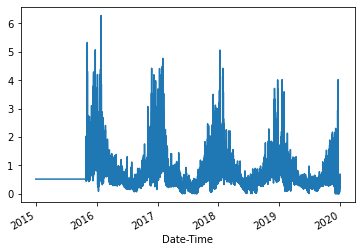

In [44]:
date_indexed_air_quality = air_quality_df.set_index('Date-Time')
date_indexed_air_quality['Mladost-CO'].plot()

<AxesSubplot:xlabel='Date-Time'>

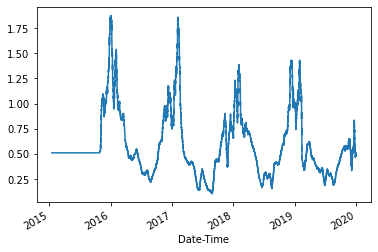

In [45]:
# use moving average
date_indexed_air_quality['Mladost-CO'].rolling(365).mean().plot()

<AxesSubplot:xlabel='Date-Time'>

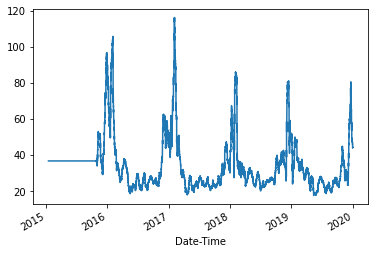

In [46]:
date_indexed_air_quality['Mladost-FDP'].rolling(365).mean().plot()

<AxesSubplot:xlabel='Date-Time'>

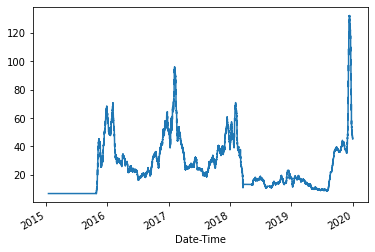

In [47]:
date_indexed_air_quality['Mladost-NO2'].rolling(365).mean().plot()

In [48]:
# As we see there is no relevant data for Mladost emissons in 2015
#Either delete 2015 entries or just drop MLadost Data
df_2015 = air_quality_df[air_quality_df["Date-Time"].dt.year == 2015]
df_2017 = air_quality_df[air_quality_df["Date-Time"].dt.year == 2017]
len(df_2015)


8760

In [49]:
for i in range(8759):
    offset = i + 17544
    air_quality_df.loc[i, "Mladost-CO"] = df_2017.loc[offset, "Mladost-CO"]
    air_quality_df.loc[i, "Mladost-FDP"] = df_2017.loc[offset, "Mladost-FDP"]
    air_quality_df.loc[i, "Mladost-NO2"] = df_2017.loc[offset, "Mladost-NO2"]

air_quality_df.head()


,Date-Time,Pavlovo-CO,Kopitoto-CO,Mladost-CO,Hipodrome-CO,Pavlovo-FDP,Kopitoto-FDP,Mladost-FDP,Hipodrome-FDP,Pavlovo-NO2,Kopitoto-NO2,Mladost-NO2,Hipodrome-NO2,temp,pressure,humidity,wind_speed,clouds_all,weather_main
0,2015-01-01 01:00:00,1.09,0.21,0.98,0.87,110.010002,13.30,100.410004,31.790001,39.730000,1.45,32.369999,18.830000,-16.99,1035,84,40.0,40,Clouds
1,2015-01-01 02:00:00,1.70,0.23,1.03,1.43,206.110001,14.42,114.760002,94.589996,53.750000,1.75,26.170000,34.330002,-17.67,1034,84,40.0,40,Clouds
2,2015-01-01 03:00:00,1.71,0.20,0.95,1.84,205.720001,13.44,103.360001,98.809998,49.349998,1.55,23.840000,54.430000,-17.60,1034,84,40.0,40,Clouds
3,2015-01-01 04:00:00,1.96,0.21,0.92,1.75,179.009995,12.45,82.250000,89.949997,56.910000,1.62,22.889999,52.889999,-17.86,1035,84,40.0,40,Clouds
4,2015-01-01 05:00:00,1.28,0.24,0.87,1.72,86.910004,12.66,67.500000,70.260002,48.330002,1.48,20.379999,47.849998,-16.58,1033,65,3.1,0,Clear


<AxesSubplot:xlabel='Date-Time'>

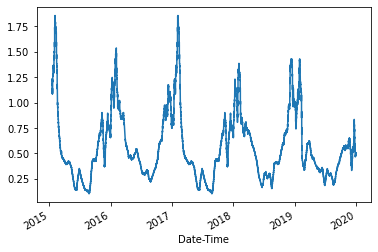

In [50]:
air_quality_df.set_index("Date-Time")['Mladost-CO'].rolling(365).mean().plot()

/var/folders/rh/d1ms6l9d7x3346sg7pr076dc0000gn/T/ipykernel_5100/761684647.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  air_quality_df.groupby(air_quality_df["Date-Time"].dt.year)["Pavlovo-CO", "Kopitoto-CO", "Mladost-CO", "Hipodrome-CO"].mean().plot(kind='bar', rot=0, ax=axs)


<AxesSubplot:xlabel='Date-Time'>

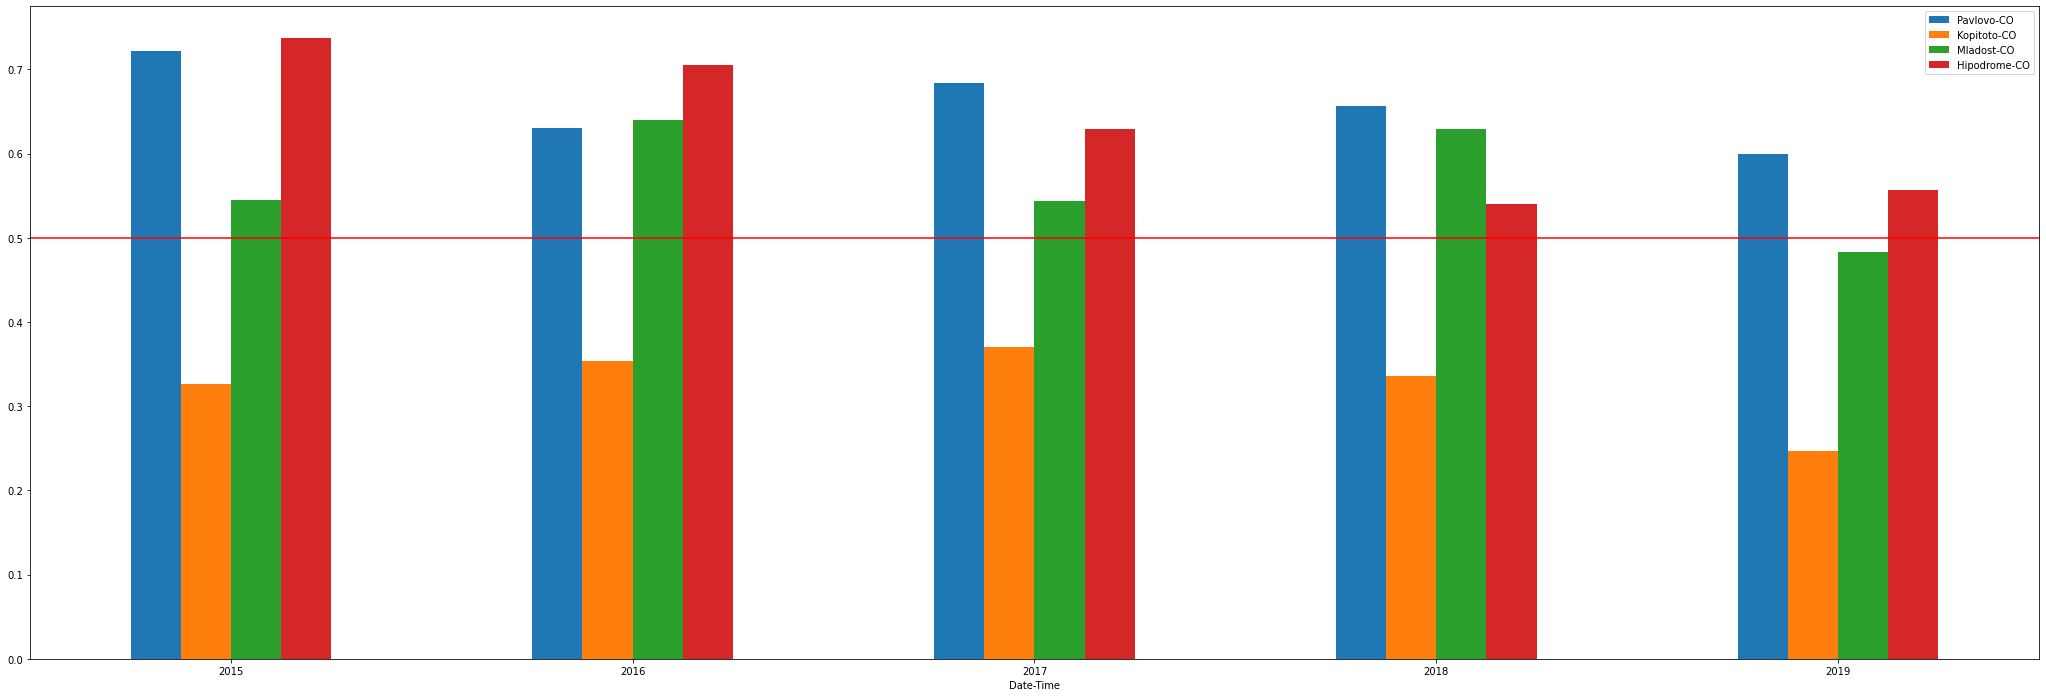

In [51]:
fig, axs = plt.subplots(figsize=(36, 12))
plt.axhline(y=0.5, color='r', linestyle='-')
air_quality_df.groupby(air_quality_df["Date-Time"].dt.year)["Pavlovo-CO", "Kopitoto-CO", "Mladost-CO", "Hipodrome-CO"].mean().plot(kind='bar', rot=0, ax=axs)

/var/folders/rh/d1ms6l9d7x3346sg7pr076dc0000gn/T/ipykernel_5100/1097981492.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  air_quality_df.groupby(air_quality_df["Date-Time"].dt.hour)["Pavlovo-CO", "Kopitoto-CO", "Mladost-CO", "Hipodrome-CO"].mean().plot(kind='line', rot=0, ax=axs)


<AxesSubplot:xlabel='Date-Time'>

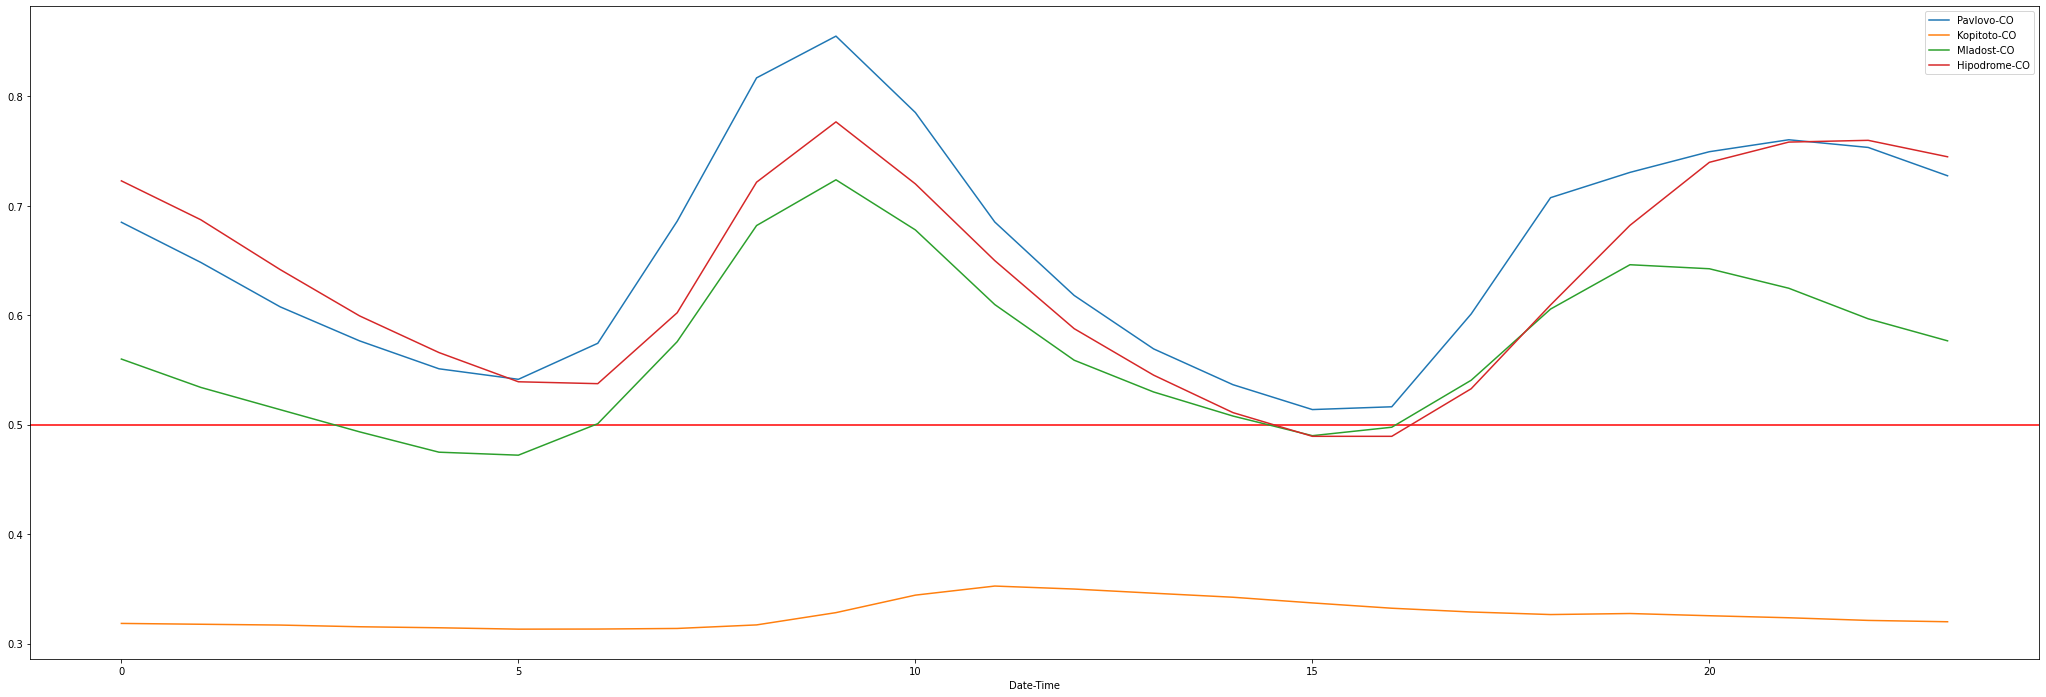

In [52]:
fig, axs = plt.subplots(figsize=(36, 12))
plt.axhline(y=0.5, color='r', linestyle='-')
air_quality_df.groupby(air_quality_df["Date-Time"].dt.hour)["Pavlovo-CO", "Kopitoto-CO", "Mladost-CO", "Hipodrome-CO"].mean().plot(kind='line', rot=0, ax=axs)

/var/folders/rh/d1ms6l9d7x3346sg7pr076dc0000gn/T/ipykernel_5100/1295679533.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  air_quality_df.groupby(air_quality_df["Date-Time"].dt.year)["Pavlovo-FDP", "Kopitoto-FDP", "Mladost-FDP", "Hipodrome-FDP"].mean().plot(kind='bar', rot=0, ax=axs)


<AxesSubplot:xlabel='Date-Time'>

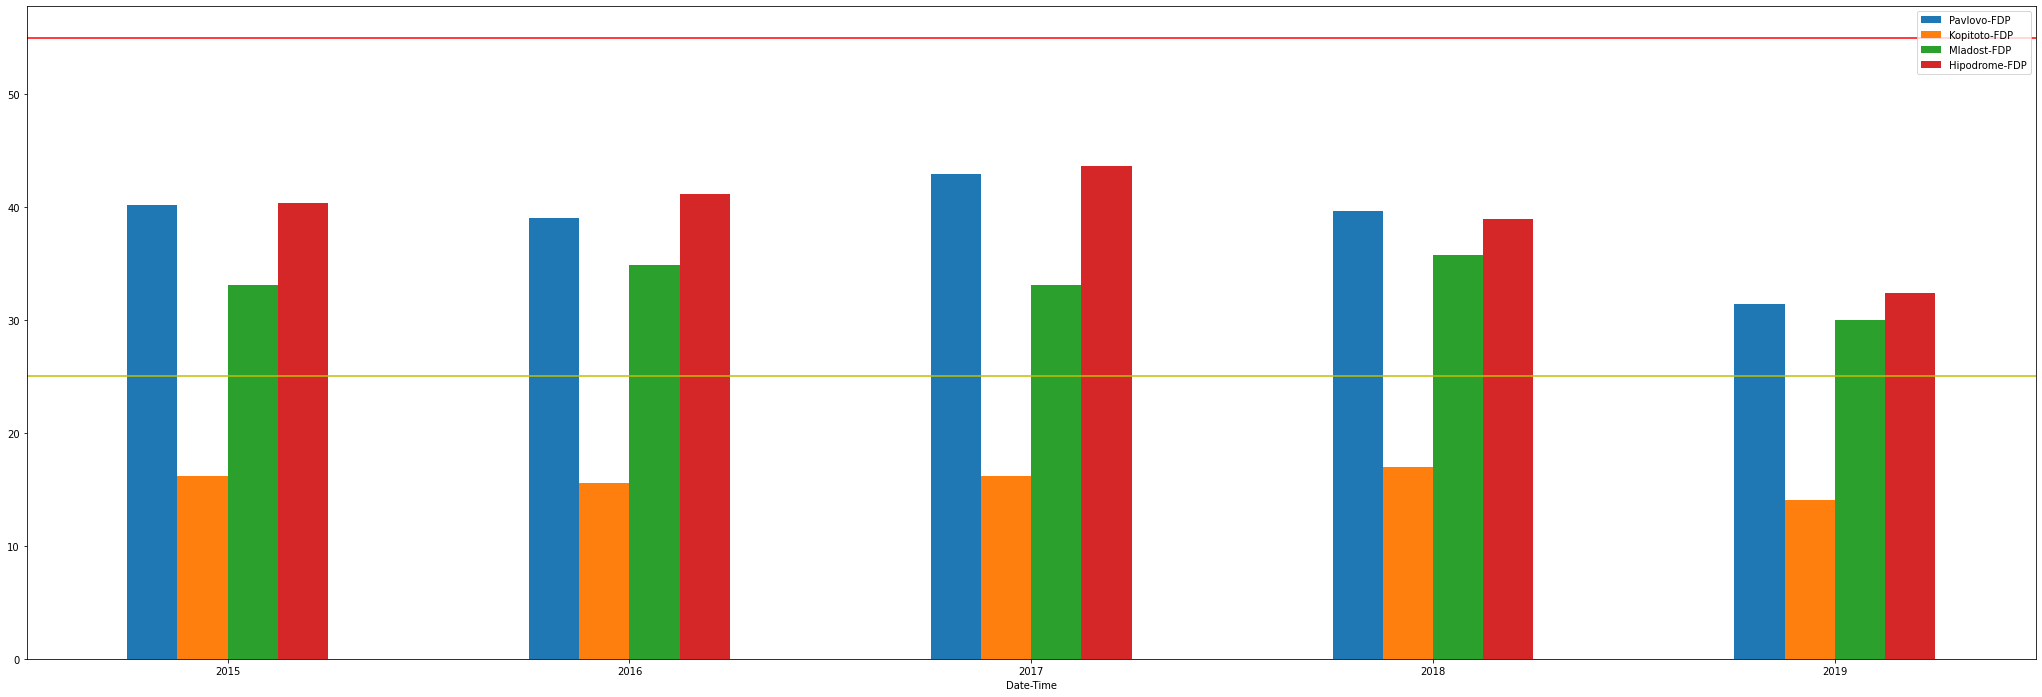

In [53]:
fig, axs = plt.subplots(figsize=(36, 12))
plt.axhline(y=55, color='r', linestyle='-')
plt.axhline(y=25, color='y', linestyle='-')
air_quality_df.groupby(air_quality_df["Date-Time"].dt.year)["Pavlovo-FDP", "Kopitoto-FDP", "Mladost-FDP", "Hipodrome-FDP"].mean().plot(kind='bar', rot=0, ax=axs)

/var/folders/rh/d1ms6l9d7x3346sg7pr076dc0000gn/T/ipykernel_5100/626311788.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  air_quality_df.groupby(air_quality_df["Date-Time"].dt.hour)["Pavlovo-FDP", "Kopitoto-FDP", "Mladost-FDP", "Hipodrome-FDP"].mean().plot(kind='line', rot=0, ax=axs)


<AxesSubplot:xlabel='Date-Time'>

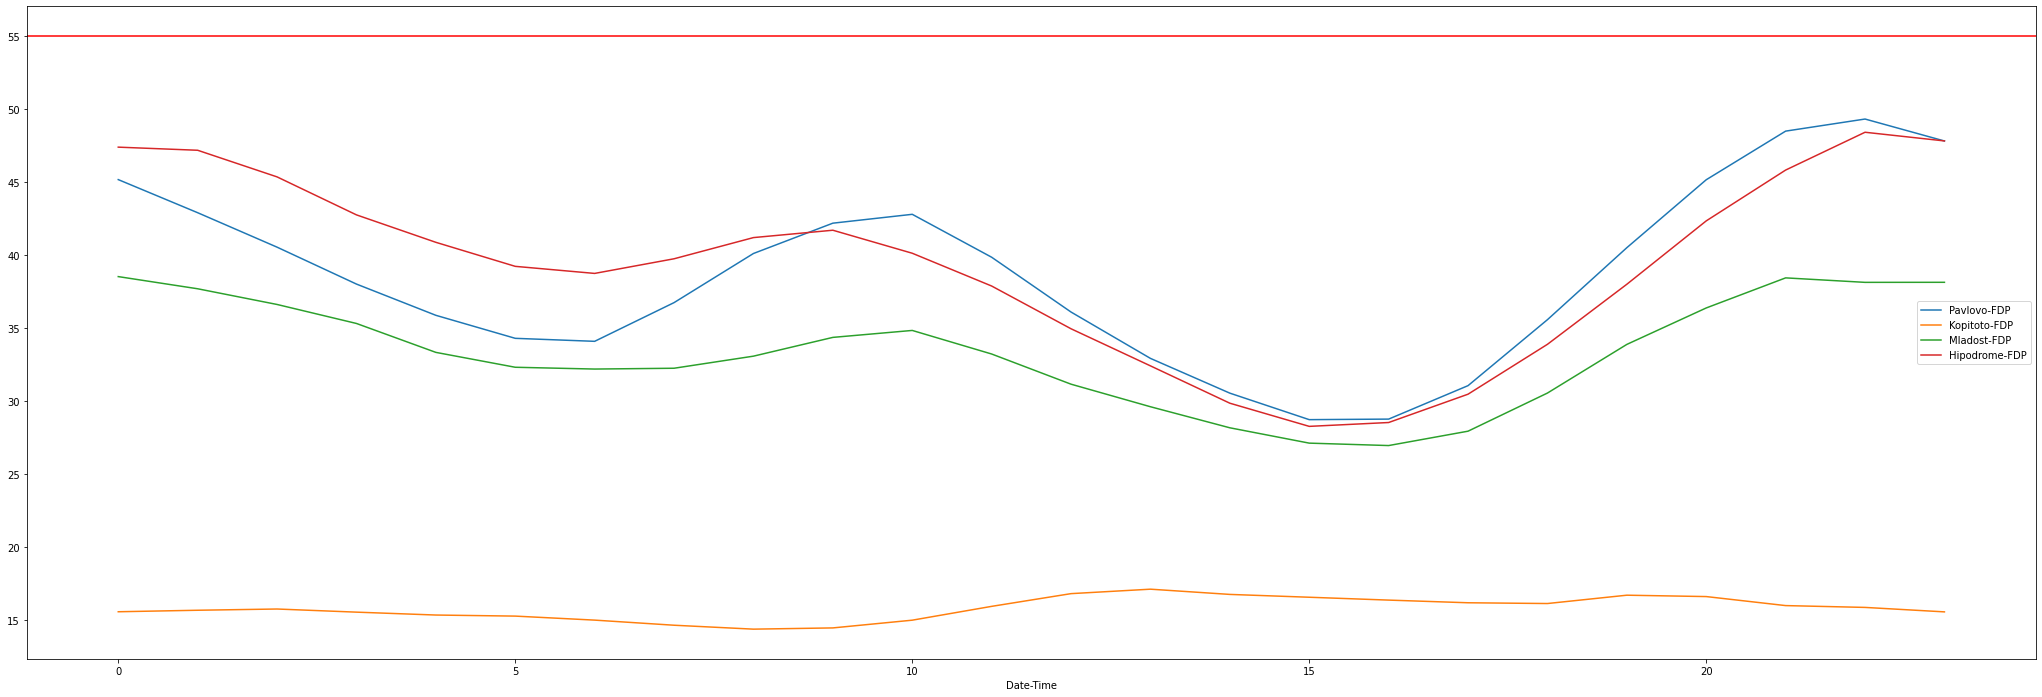

In [54]:

fig, axs = plt.subplots(figsize=(36, 12))
plt.axhline(y=55, color='r', linestyle='-')
air_quality_df.groupby(air_quality_df["Date-Time"].dt.hour)["Pavlovo-FDP", "Kopitoto-FDP", "Mladost-FDP", "Hipodrome-FDP"].mean().plot(kind='line', rot=0, ax=axs)

In [55]:
air_quality_df['Date-Time'].head()

0   2015-01-01 01:00:00
1   2015-01-01 02:00:00
2   2015-01-01 03:00:00
3   2015-01-01 04:00:00
4   2015-01-01 05:00:00
Name: Date-Time, dtype: datetime64[ns]

/var/folders/rh/d1ms6l9d7x3346sg7pr076dc0000gn/T/ipykernel_5100/18178506.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  air_quality_df.groupby(air_quality_df["Date-Time"].dt.year)["Pavlovo-NO2", "Kopitoto-NO2", "Mladost-NO2", "Hipodrome-NO2"].mean().plot(kind='bar', rot=0, ax=axs)


<AxesSubplot:xlabel='Date-Time'>

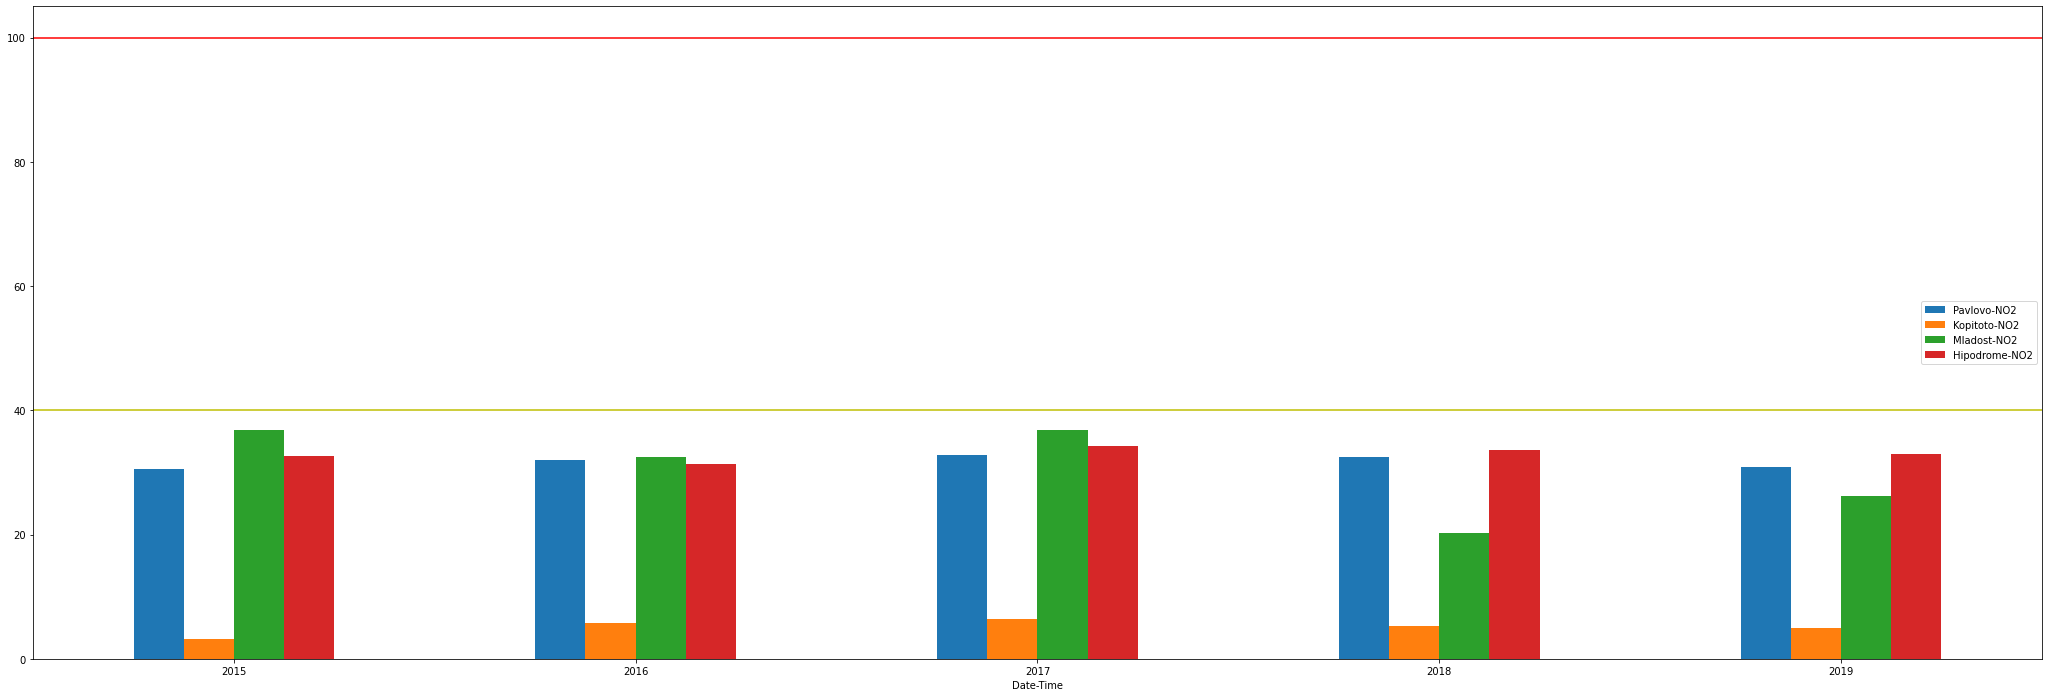

In [56]:
fig, axs = plt.subplots(figsize=(36, 12))
plt.axhline(y=100, color='r', linestyle='-')
plt.axhline(y=40, color='y', linestyle='-')
air_quality_df.groupby(air_quality_df["Date-Time"].dt.year)["Pavlovo-NO2", "Kopitoto-NO2", "Mladost-NO2", "Hipodrome-NO2"].mean().plot(kind='bar', rot=0, ax=axs)

/var/folders/rh/d1ms6l9d7x3346sg7pr076dc0000gn/T/ipykernel_5100/304790642.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  air_quality_df.groupby(air_quality_df["Date-Time"].dt.hour)["Pavlovo-NO2", "Kopitoto-NO2", "Mladost-NO2", "Hipodrome-NO2"].mean().plot(kind='line', rot=0, ax=axs)


<AxesSubplot:xlabel='Date-Time'>

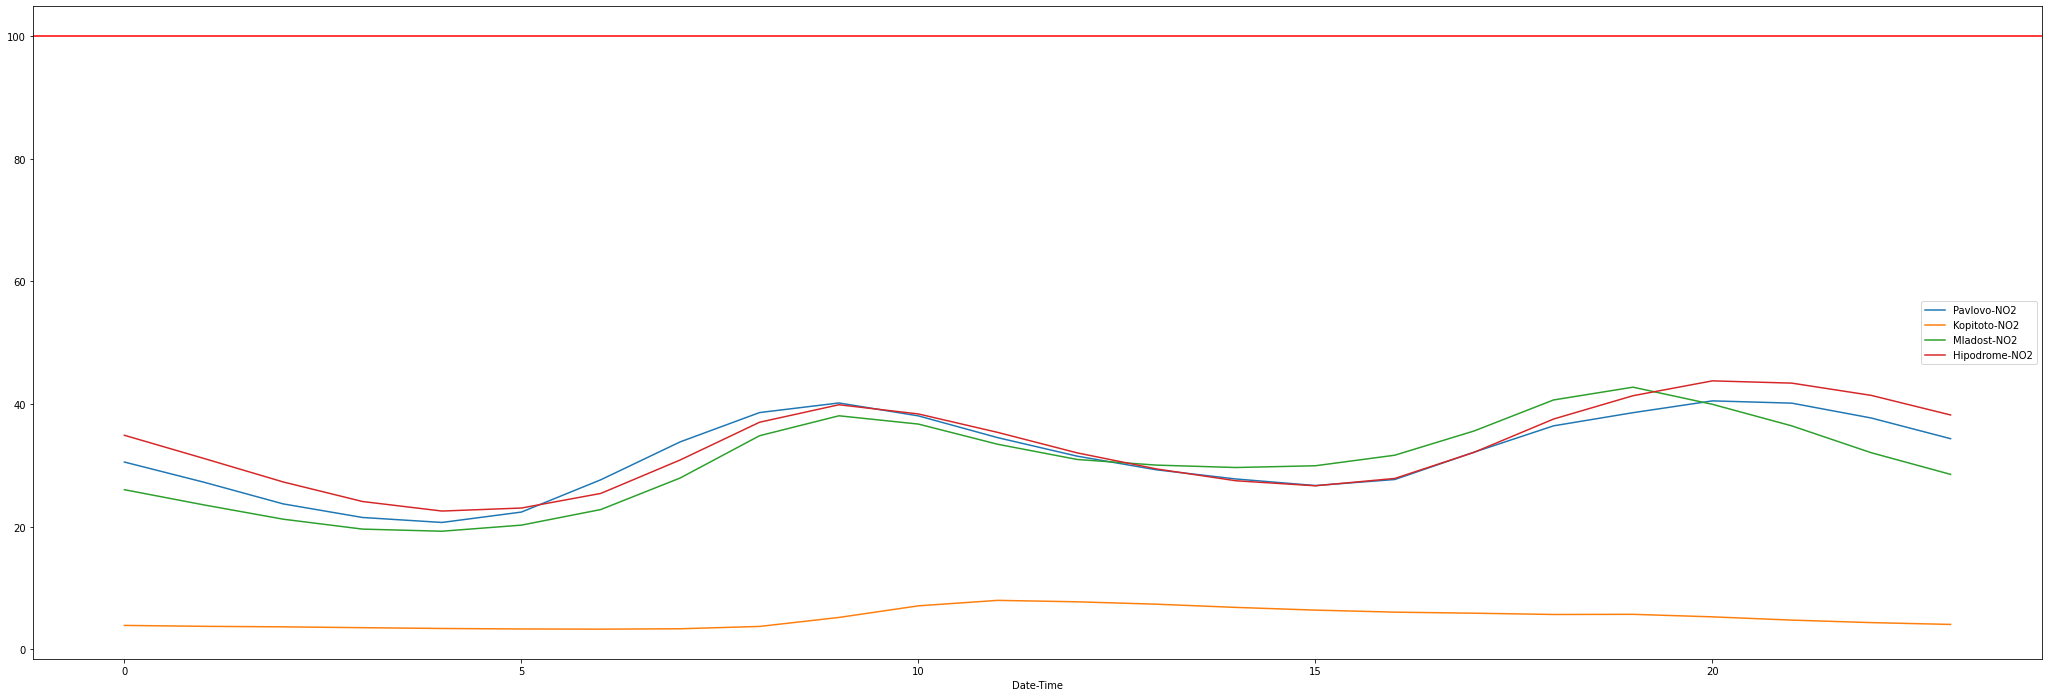

In [57]:

fig, axs = plt.subplots(figsize=(36, 12))
plt.axhline(y=100, color='r', linestyle='-')
air_quality_df.groupby(air_quality_df["Date-Time"].dt.hour)["Pavlovo-NO2", "Kopitoto-NO2", "Mladost-NO2", "Hipodrome-NO2"].mean().plot(kind='line', rot=0, ax=axs)

In [58]:
# standartize/normalize? this shit

[Text(0, 0, 'Pavlovo-CO'),
 Text(1, 0, 'Kopitoto-CO'),
 Text(2, 0, 'Mladost-CO'),
 Text(3, 0, 'Hipodrome-CO'),
 Text(4, 0, 'Pavlovo-FDP'),
 Text(5, 0, 'Kopitoto-FDP'),
 Text(6, 0, 'Mladost-FDP'),
 Text(7, 0, 'Hipodrome-FDP'),
 Text(8, 0, 'Pavlovo-NO2'),
 Text(9, 0, 'Kopitoto-NO2'),
 Text(10, 0, 'Mladost-NO2'),
 Text(11, 0, 'Hipodrome-NO2'),
 Text(12, 0, 'temp'),
 Text(13, 0, 'pressure'),
 Text(14, 0, 'humidity'),
 Text(15, 0, 'wind_speed'),
 Text(16, 0, 'clouds_all')]

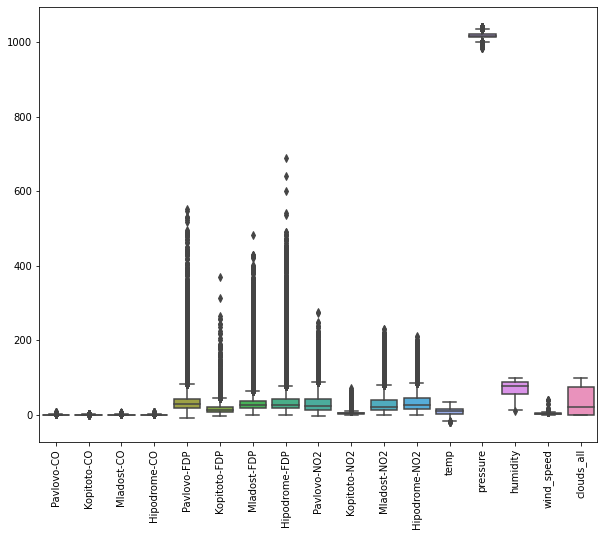

In [59]:
# Cleanup DONE
air_quality_df_measures = air_quality_df[["Pavlovo-CO", 'Kopitoto-CO', 'Mladost-CO', 'Hipodrome-CO', "Pavlovo-FDP", 'Kopitoto-FDP', 'Mladost-FDP', 'Hipodrome-FDP', "Pavlovo-NO2", 'Kopitoto-NO2', 'Mladost-NO2', 'Hipodrome-NO2', "temp", "pressure", "humidity", "wind_speed", "clouds_all"]]
fig, ax=plt.subplots(figsize=(10,8))
bp = sns.boxplot(data = air_quality_df_measures)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

In [60]:
scaled_air_quality_df = scaler.fit_transform(air_quality_df_measures)
scaled_air_quality_df =pd.DataFrame(scaled_air_quality_df, columns = air_quality_df_measures.columns)
scaled_air_quality_df.head()

,Pavlovo-CO,Kopitoto-CO,Mladost-CO,Hipodrome-CO,Pavlovo-FDP,Kopitoto-FDP,Mladost-FDP,Hipodrome-FDP,Pavlovo-NO2,Kopitoto-NO2,Mladost-NO2,Hipodrome-NO2,temp,pressure,humidity,wind_speed,clouds_all
0,0.727569,-0.578410,0.834216,0.368238,1.712591,-0.190866,2.066845,-0.166107,0.306834,-0.674582,0.066836,-0.595858,-2.961972,2.525251,0.600340,17.503465,0.123143
1,1.755446,-0.479434,0.935498,1.241833,4.018960,-0.105507,2.509091,1.224238,0.846504,-0.619457,-0.156822,0.056422,-3.036773,2.380789,0.600340,17.503465,0.123143
2,1.772296,-0.627898,0.773447,1.881430,4.009600,-0.180196,2.157760,1.317665,0.677135,-0.656207,-0.240874,0.902283,-3.029073,2.380789,0.600340,17.503465,0.123143
3,2.193557,-0.578410,0.712677,1.741031,3.368569,-0.255647,1.507181,1.121512,0.968141,-0.643345,-0.275144,0.837475,-3.057673,2.525251,0.600340,17.503465,0.123143
4,1.047727,-0.429947,0.611395,1.694231,1.158198,-0.239642,1.052607,0.685590,0.637872,-0.669070,-0.365690,0.625379,-2.916872,2.236328,-0.331268,0.023401,-0.961444


In [61]:
scaled_air_quality_df.describe()

,Pavlovo-CO,Kopitoto-CO,Mladost-CO,Hipodrome-CO,Pavlovo-FDP,Kopitoto-FDP,Mladost-FDP,Hipodrome-FDP,Pavlovo-NO2,Kopitoto-NO2,Mladost-NO2,Hipodrome-NO2,temp,pressure,humidity,wind_speed,clouds_all
count,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04,4.382400e+04
mean,4.669503e-17,-1.452734e-16,1.815918e-17,5.188337e-17,5.512608e-17,4.150670e-17,1.297084e-18,-4.150670e-17,-8.301339e-17,-1.167376e-17,6.226004e-17,-2.594168e-17,4.669503e-17,-4.656532e-15,-1.297084e-17,-5.188337e-18,-9.079590e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-1.345034e+00,-2.805361e+00,-1.150914e+00,-9.889553e-01,-1.124892e+00,-1.526883e+00,-1.016549e+00,-8.603935e-01,-1.335272e+00,-1.218480e+00,-1.094743e+00,-1.413102e+00,-3.267775e+00,-4.842305e+00,-2.978995e+00,-1.435639e+00,-9.614445e-01
25%,-5.193627e-01,-6.773856e-01,-5.432211e-01,-5.209577e-01,-5.193797e-01,-6.727238e-01,-4.778407e-01,-4.798199e-01,-7.205406e-01,-5.294203e-01,-6.560845e-01,-7.296805e-01,-7.696528e-01,-6.529101e-01,-7.235239e-01,-7.345418e-01,-9.614445e-01
50%,-3.171575e-01,-1.330198e-01,-2.596311e-01,-2.869589e-01,-2.592231e-01,-1.801959e-01,-2.463935e-01,-2.721538e-01,-2.701742e-01,-2.703339e-01,-3.047249e-01,-2.772926e-01,2.785424e-02,-7.506256e-02,2.080839e-01,-2.134559e-01,-4.191505e-01
75%,8.725278e-02,6.092969e-01,2.062667e-01,1.186389e-01,1.182919e-01,4.478010e-01,1.021640e-01,5.373594e-02,4.250069e-01,8.430212e-02,3.290933e-01,4.584164e-01,7.450606e-01,6.472469e-01,7.474357e-01,4.971158e-01,1.072158e+00
max,1.085468e+01,1.055634e+01,1.157012e+01,1.142858e+01,1.234685e+01,2.690827e+01,1.386911e+01,1.439842e+01,9.370748e+00,1.234405e+01,7.164734e+00,7.552174e+00,2.787779e+00,3.392023e+00,1.384852e+00,1.750347e+01,1.750025e+00


[Text(0, 0, 'Pavlovo-CO'),
 Text(1, 0, 'Kopitoto-CO'),
 Text(2, 0, 'Mladost-CO'),
 Text(3, 0, 'Hipodrome-CO'),
 Text(4, 0, 'Pavlovo-FDP'),
 Text(5, 0, 'Kopitoto-FDP'),
 Text(6, 0, 'Mladost-FDP'),
 Text(7, 0, 'Hipodrome-FDP'),
 Text(8, 0, 'Pavlovo-NO2'),
 Text(9, 0, 'Kopitoto-NO2'),
 Text(10, 0, 'Mladost-NO2'),
 Text(11, 0, 'Hipodrome-NO2'),
 Text(12, 0, 'temp'),
 Text(13, 0, 'pressure'),
 Text(14, 0, 'humidity'),
 Text(15, 0, 'wind_speed'),
 Text(16, 0, 'clouds_all')]

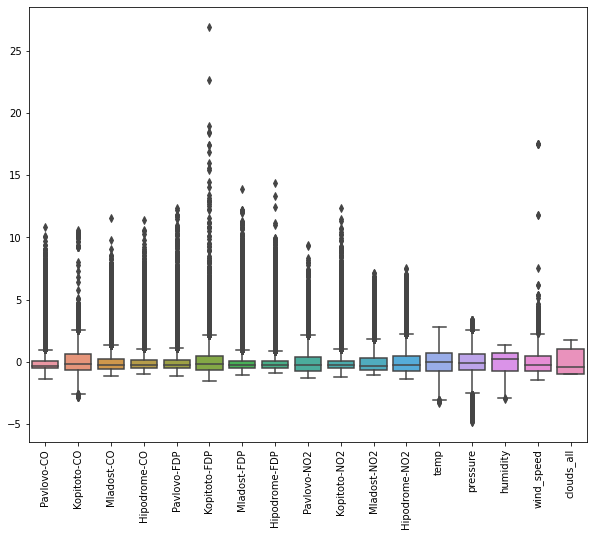

In [62]:
fig, ax=plt.subplots(figsize=(10,8))
bp = sns.boxplot(data = scaled_air_quality_df)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

/var/folders/rh/d1ms6l9d7x3346sg7pr076dc0000gn/T/ipykernel_5100/3693887798.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  scaled_air_quality_df.groupby(scaled_air_quality_df["Date-Time"].dt.hour)["Pavlovo-CO", "Pavlovo-FDP", "Pavlovo-NO2"].mean().plot(kind='line', rot=0, ax=axs)


<AxesSubplot:xlabel='Date-Time'>

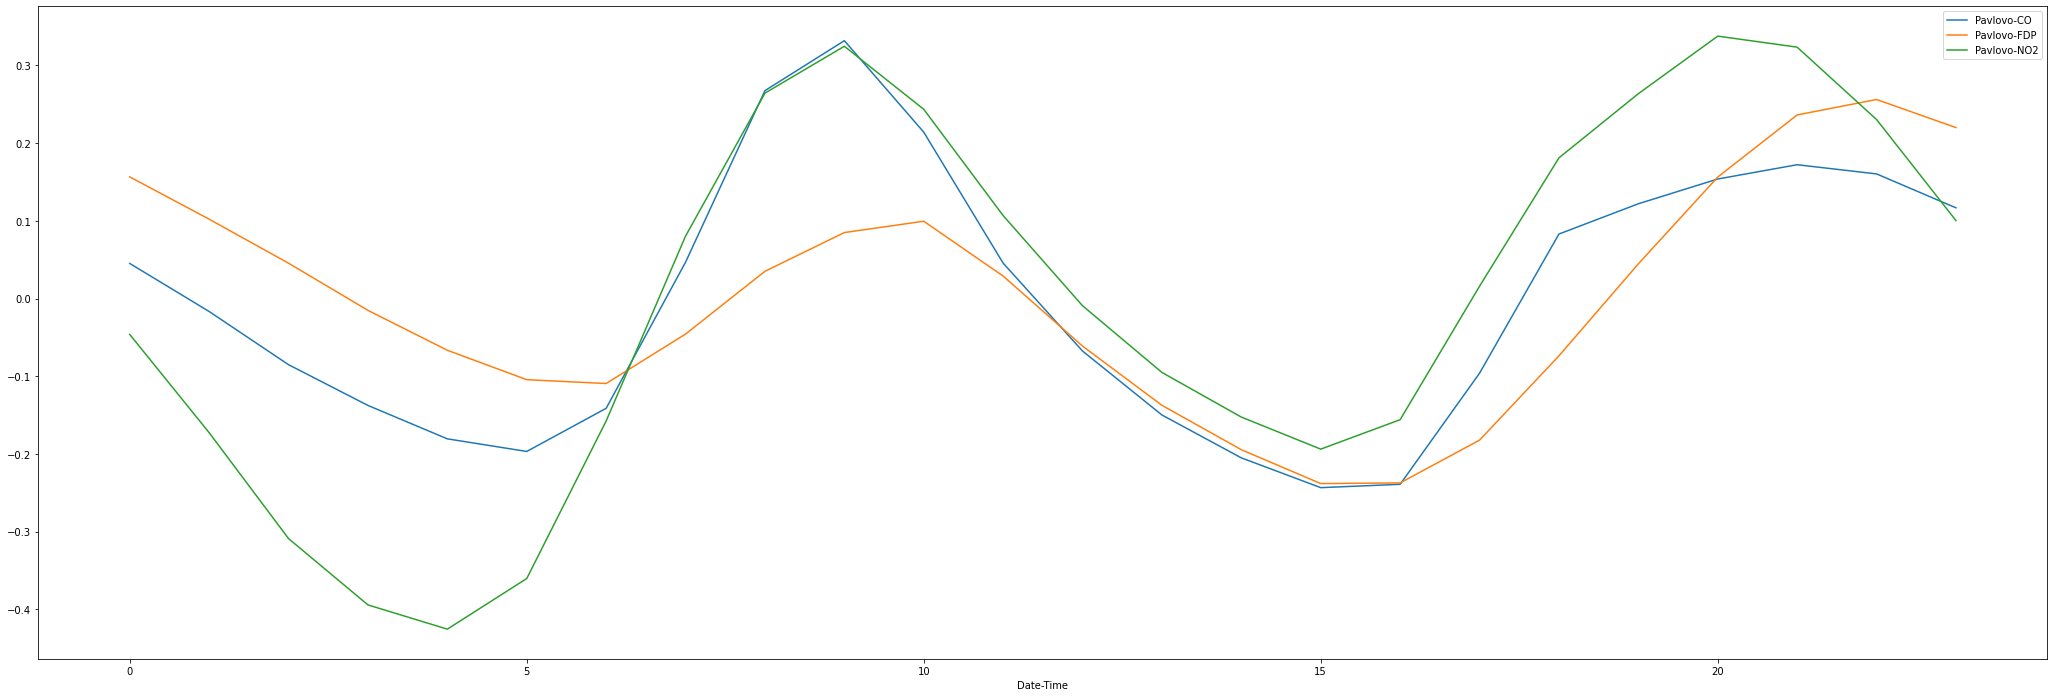

In [63]:
fig, axs = plt.subplots(figsize=(36, 12))
scaled_air_quality_df.insert(0, "Date-Time", air_quality_df["Date-Time"], True)
scaled_air_quality_df.groupby(scaled_air_quality_df["Date-Time"].dt.hour)["Pavlovo-CO", "Pavlovo-FDP", "Pavlovo-NO2"].mean().plot(kind='line', rot=0, ax=axs)

/var/folders/rh/d1ms6l9d7x3346sg7pr076dc0000gn/T/ipykernel_5100/3001291507.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  scaled_air_quality_df.groupby(scaled_air_quality_df["Date-Time"].dt.year)["Pavlovo-CO", "Pavlovo-FDP", "Pavlovo-NO2"].mean().plot(kind='line', rot=0, ax=axs)


<AxesSubplot:xlabel='Date-Time'>

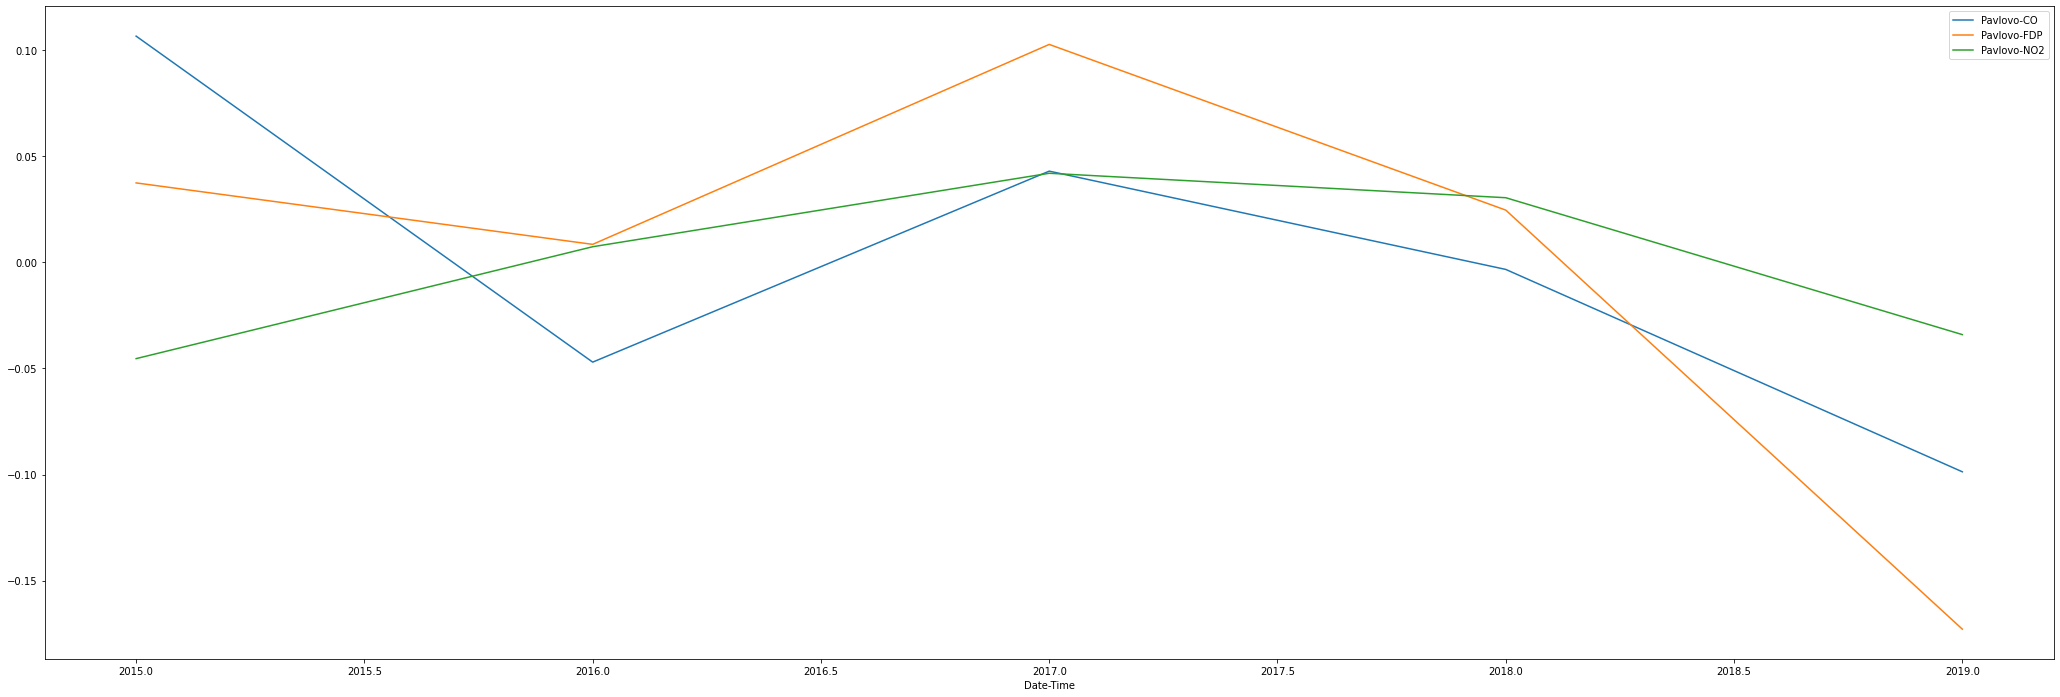

In [64]:
fig, axs = plt.subplots(figsize=(36, 12))
scaled_air_quality_df.groupby(scaled_air_quality_df["Date-Time"].dt.year)["Pavlovo-CO", "Pavlovo-FDP", "Pavlovo-NO2"].mean().plot(kind='line', rot=0, ax=axs)

/var/folders/rh/d1ms6l9d7x3346sg7pr076dc0000gn/T/ipykernel_5100/2113084629.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  scaled_air_quality_df.groupby(scaled_air_quality_df["Date-Time"].dt.hour)["Pavlovo-CO", "Pavlovo-FDP", "Pavlovo-NO2"].mean().plot(kind='line', rot=0, ax=axs)


<AxesSubplot:xlabel='Date-Time'>

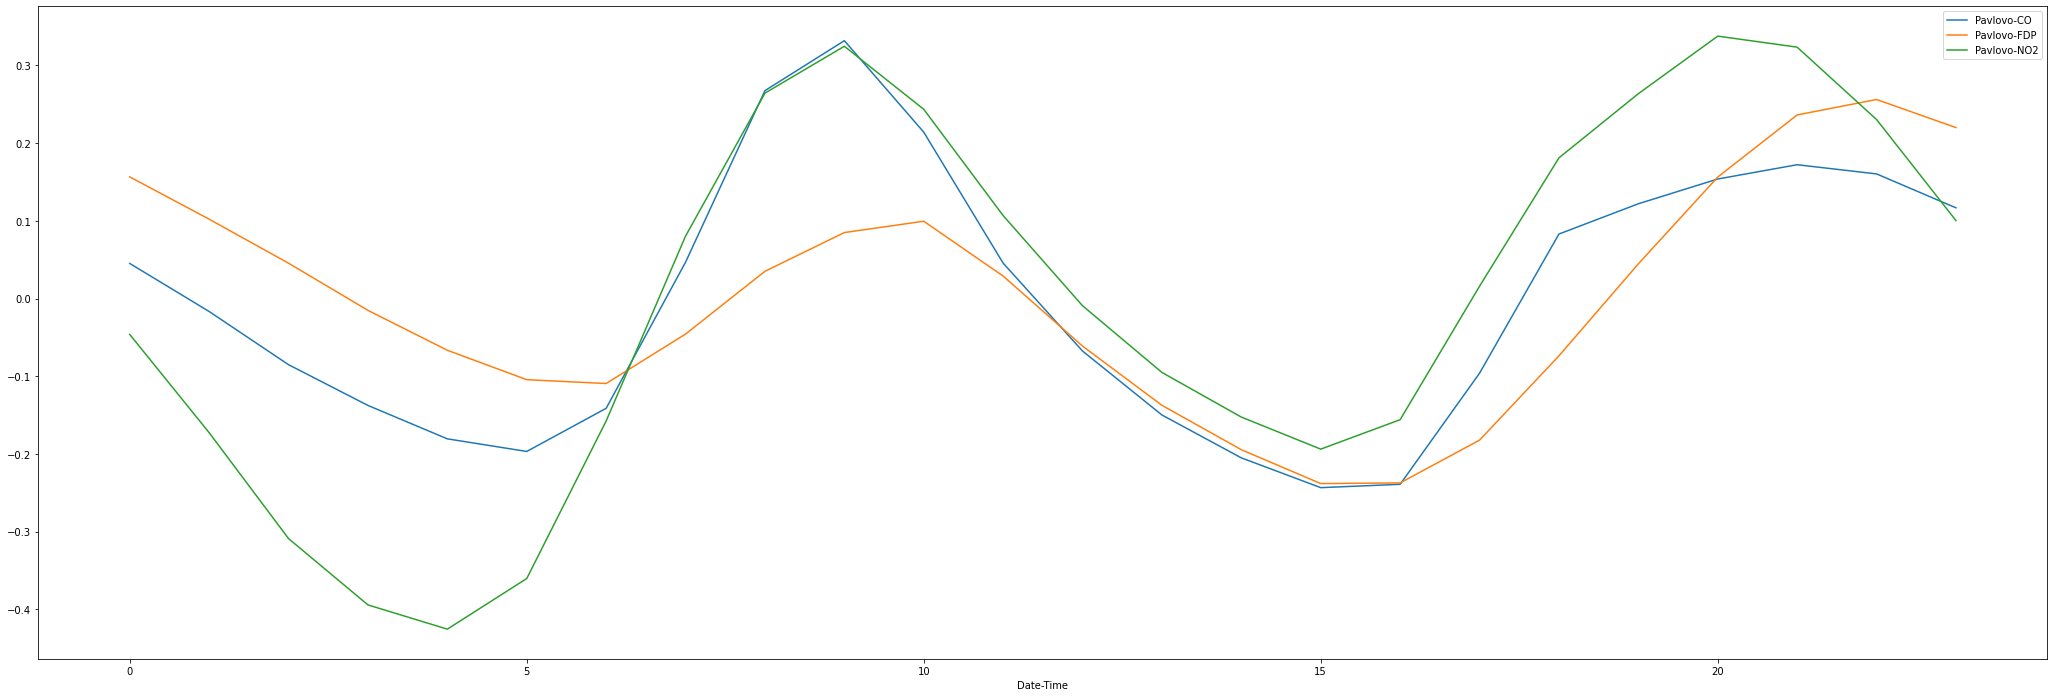

In [65]:
fig, axs = plt.subplots(figsize=(36, 12))
scaled_air_quality_df.groupby(scaled_air_quality_df["Date-Time"].dt.hour)["Pavlovo-CO", "Pavlovo-FDP", "Pavlovo-NO2"].mean().plot(kind='line', rot=0, ax=axs)

/var/folders/rh/d1ms6l9d7x3346sg7pr076dc0000gn/T/ipykernel_5100/3630289000.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  scaled_air_quality_df.groupby(scaled_air_quality_df["Date-Time"].dt.year)["Kopitoto-CO", "Kopitoto-FDP", "Kopitoto-NO2"].mean().plot(kind='line', rot=0, ax=axs)


<AxesSubplot:xlabel='Date-Time'>

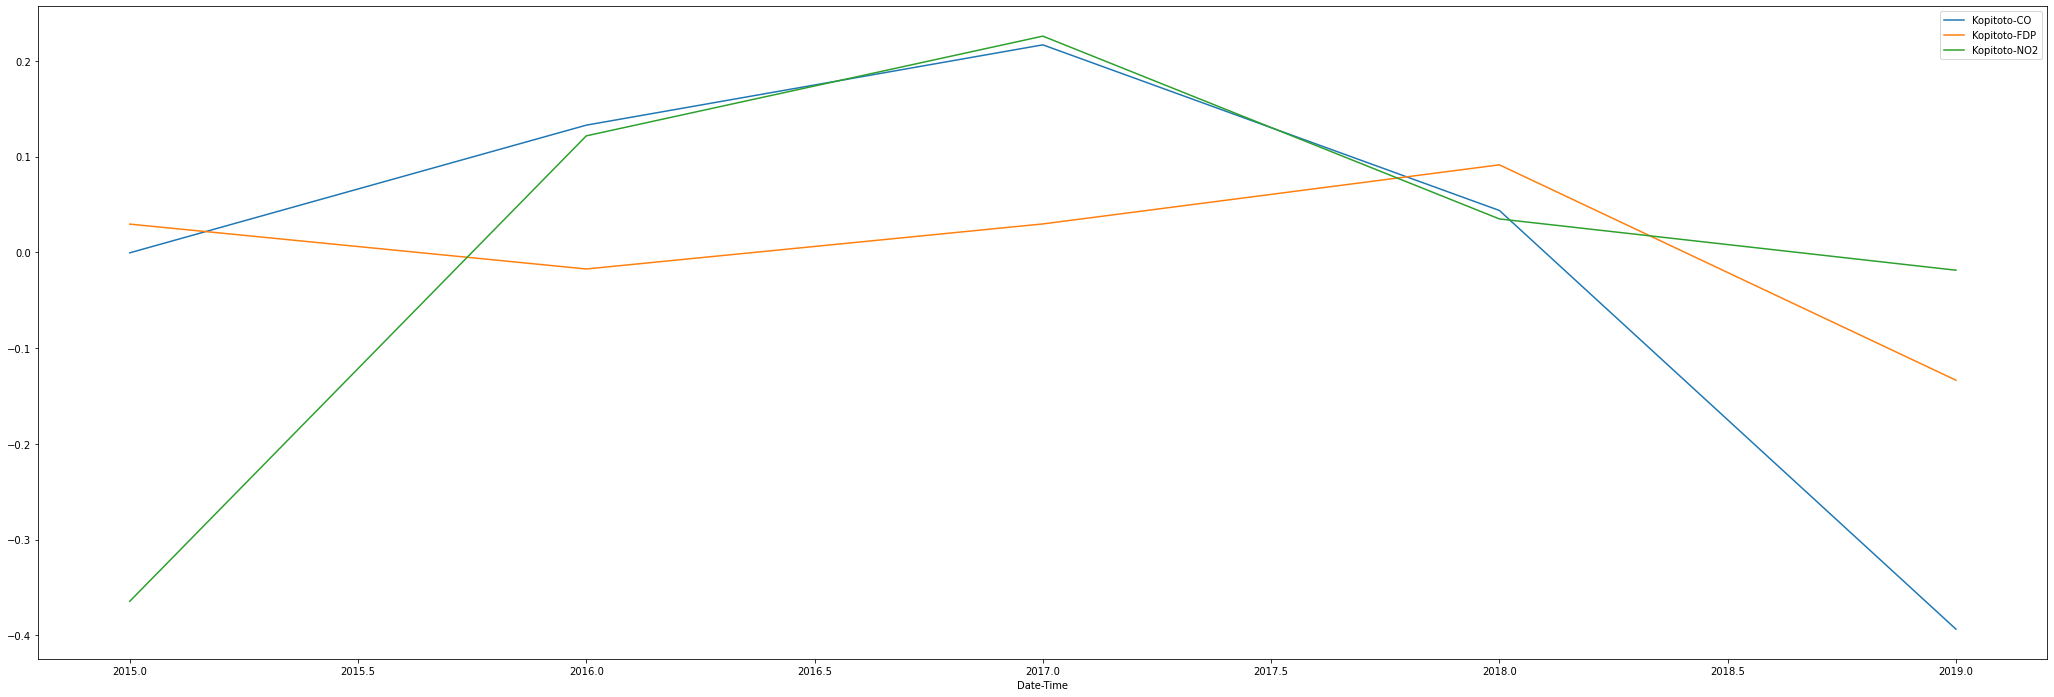

In [66]:
fig, axs = plt.subplots(figsize=(36, 12))
scaled_air_quality_df.groupby(scaled_air_quality_df["Date-Time"].dt.year)["Kopitoto-CO", "Kopitoto-FDP", "Kopitoto-NO2"].mean().plot(kind='line', rot=0, ax=axs)

/var/folders/rh/d1ms6l9d7x3346sg7pr076dc0000gn/T/ipykernel_5100/979945539.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  scaled_air_quality_df.groupby(scaled_air_quality_df["Date-Time"].dt.year)["Hipodrome-CO", "Hipodrome-FDP", "Hipodrome-NO2"].mean().plot(kind='line', rot=0, ax=axs)


<AxesSubplot:xlabel='Date-Time'>

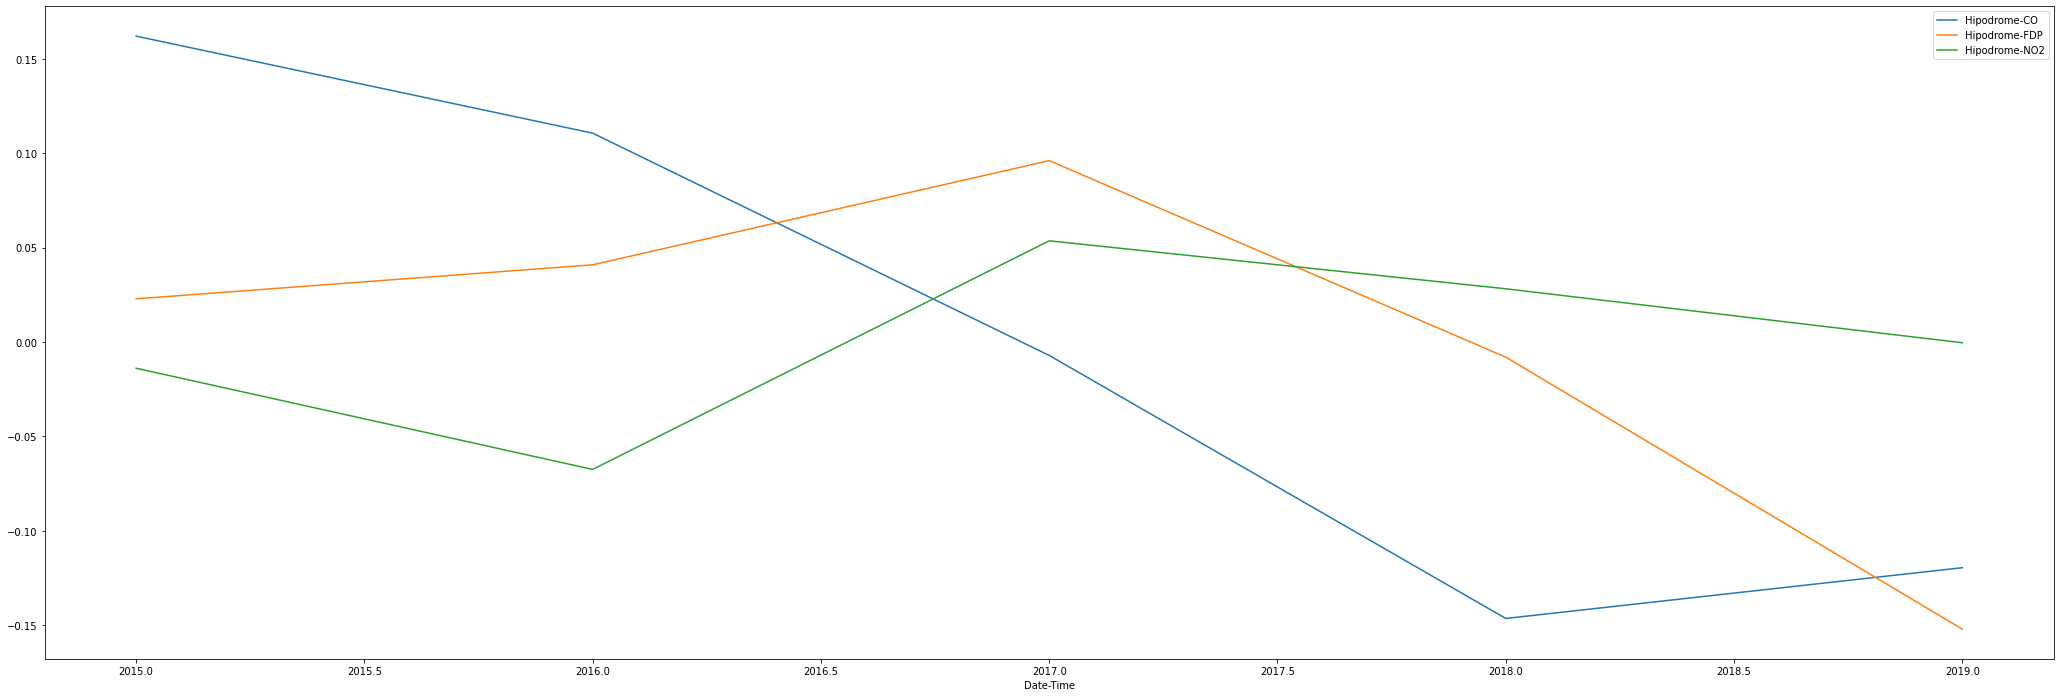

In [67]:
fig, axs = plt.subplots(figsize=(36, 12))
scaled_air_quality_df.groupby(scaled_air_quality_df["Date-Time"].dt.year)["Hipodrome-CO", "Hipodrome-FDP", "Hipodrome-NO2"].mean().plot(kind='line', rot=0, ax=axs)

['Pavlovo-CO', 'Kopitoto-CO', 'Mladost-CO', 'Hipodrome-CO', 'Kopitoto-FDP', 'Kopitoto-NO2', 'temp', 'pressure', 'humidity', 'wind_speed', 'clouds_all', 'weather_main']


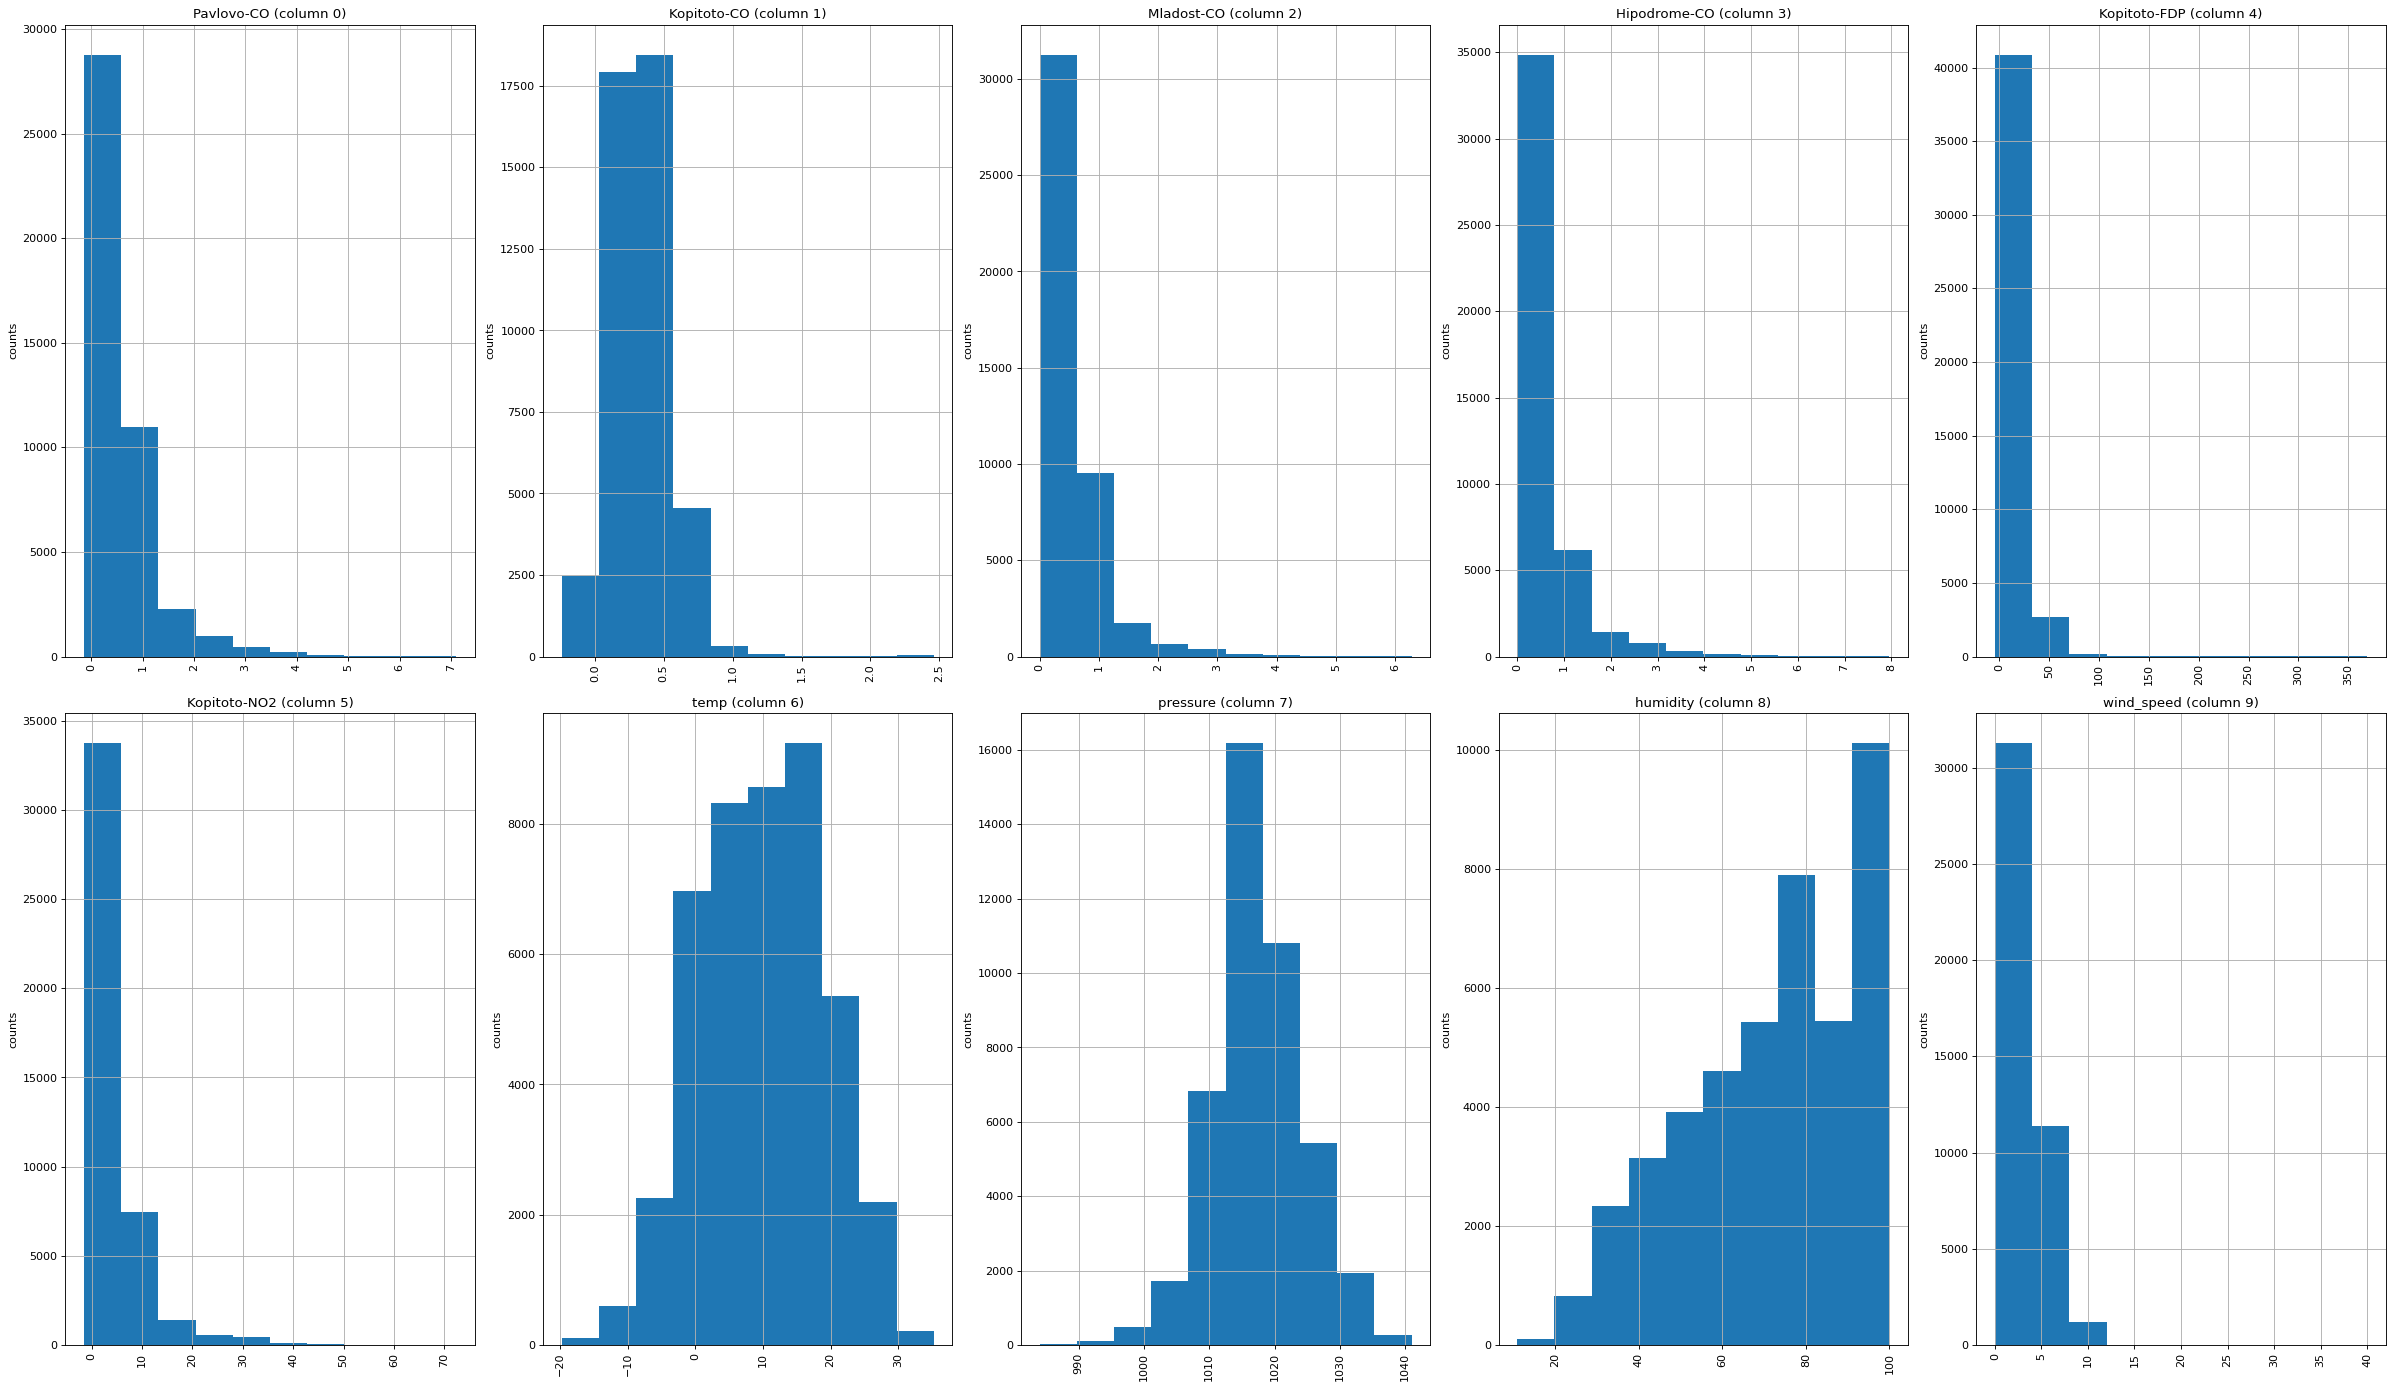

In [68]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 5000]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    print(columnNames)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(int(nGraphRow), int(nGraphPerRow), i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(air_quality_df, 10, 5)

In [69]:
Q1 = air_quality_df_measures.quantile(0.25)
Q3 = air_quality_df_measures.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Pavlovo-CO        0.360000
Kopitoto-CO       0.260000
Mladost-CO        0.370000
Hipodrome-CO      0.410000
Pavlovo-FDP      26.570002
Kopitoto-FDP     14.702500
Mladost-FDP      18.820000
Hipodrome-FDP    24.100000
Pavlovo-NO2      29.759999
Kopitoto-NO2      3.340000
Mladost-NO2      27.309999
Hipodrome-NO2    28.232501
temp             13.770000
pressure          9.000000
humidity         30.000000
wind_speed        2.600000
clouds_all       75.000000
dtype: float64


In [70]:
outliers_removed_data = air_quality_df_measures[~((air_quality_df_measures<(Q1-1.5*IQR))\
                                        | (air_quality_df_measures>(Q3+1.5*IQR))).any(axis=1)]
outliers_removed_data.shape

(30152, 17)

[Text(0, 0, 'Pavlovo-CO'),
 Text(1, 0, 'Kopitoto-CO'),
 Text(2, 0, 'Mladost-CO'),
 Text(3, 0, 'Hipodrome-CO'),
 Text(4, 0, 'Pavlovo-FDP'),
 Text(5, 0, 'Kopitoto-FDP'),
 Text(6, 0, 'Mladost-FDP'),
 Text(7, 0, 'Hipodrome-FDP'),
 Text(8, 0, 'Pavlovo-NO2'),
 Text(9, 0, 'Kopitoto-NO2'),
 Text(10, 0, 'Mladost-NO2'),
 Text(11, 0, 'Hipodrome-NO2'),
 Text(12, 0, 'temp'),
 Text(13, 0, 'pressure'),
 Text(14, 0, 'humidity'),
 Text(15, 0, 'wind_speed'),
 Text(16, 0, 'clouds_all')]

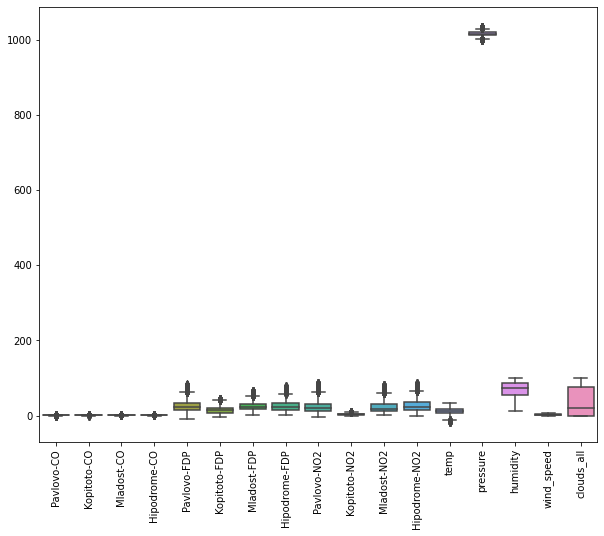

In [71]:
fig, ax=plt.subplots(figsize=(10,8))
bp = sns.boxplot(data = outliers_removed_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

In [72]:
co_col = scaled_air_quality_df.loc[: , "Pavlovo-CO":"Hipodrome-CO"]
fdp_col = scaled_air_quality_df.loc[: , "Pavlovo-FDP":"Hipodrome-FDP"]
no2_col = scaled_air_quality_df.loc[: , "Pavlovo-NO2":"Hipodrome-NO2"]
scaled_air_quality_df['Sofia-CO'] = co_col.mean(axis=1)
scaled_air_quality_df['Sofia-FDP'] = fdp_col.mean(axis=1)
scaled_air_quality_df['Sofia-NO2'] = no2_col.mean(axis=1)

scaled_air_quality_df.drop('Pavlovo-CO', axis='columns', inplace=True)
scaled_air_quality_df.drop('Kopitoto-CO', axis='columns', inplace=True)
scaled_air_quality_df.drop('Mladost-CO', axis='columns', inplace=True)
scaled_air_quality_df.drop('Hipodrome-CO', axis='columns', inplace=True)

scaled_air_quality_df.drop('Pavlovo-FDP', axis='columns', inplace=True)
scaled_air_quality_df.drop('Kopitoto-FDP', axis='columns', inplace=True)
scaled_air_quality_df.drop('Mladost-FDP', axis='columns', inplace=True)
scaled_air_quality_df.drop('Hipodrome-FDP', axis='columns', inplace=True)

scaled_air_quality_df.drop('Pavlovo-NO2', axis='columns', inplace=True)
scaled_air_quality_df.drop('Kopitoto-NO2', axis='columns', inplace=True)
scaled_air_quality_df.drop('Mladost-NO2', axis='columns', inplace=True)
scaled_air_quality_df.drop('Hipodrome-NO2', axis='columns', inplace=True)

scaled_air_quality_df.head()

,Date-Time,temp,pressure,humidity,wind_speed,clouds_all,Sofia-CO,Sofia-FDP,Sofia-NO2
0,2015-01-01 01:00:00,-2.961972,2.525251,0.600340,17.503465,0.123143,0.337903,0.855616,-0.224193
1,2015-01-01 02:00:00,-3.036773,2.380789,0.600340,17.503465,0.123143,0.863336,1.911695,0.031662
2,2015-01-01 03:00:00,-3.029073,2.380789,0.600340,17.503465,0.123143,0.949819,1.826207,0.170584
3,2015-01-01 04:00:00,-3.057673,2.525251,0.600340,17.503465,0.123143,1.017214,1.435403,0.221782
4,2015-01-01 05:00:00,-2.916872,2.236328,-0.331268,0.023401,-0.961444,0.730852,0.664188,0.057123


/var/folders/rh/d1ms6l9d7x3346sg7pr076dc0000gn/T/ipykernel_5100/2936318109.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


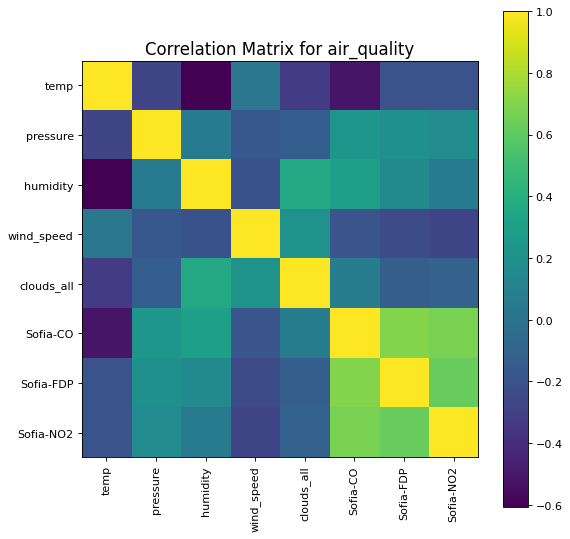

In [73]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "air_quality"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
plotCorrelationMatrix(scaled_air_quality_df, 8)

In [74]:
data = scaled_air_quality_df
data_trans  = discretizer.fit_transform(data[['Sofia-CO','Sofia-FDP', 'Sofia-NO2']])
print(data_trans[:10,:])

[[0. 0. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Coefficients: 
 [[0.63918679]]
Mean squared error: 0.30
Coefficient of determination: 0.72


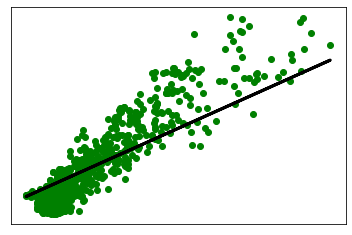

In [77]:
linear_regr = LinearRegression()
y = np.array(scaled_air_quality_df['Sofia-FDP']).reshape((-1, 1))
x = np.array(scaled_air_quality_df[[ 'Sofia-CO',]])

fdp_x_train = x[:-1000]
fdp_x_test = x[-1000:]
fdp_y_train = y[:-1000]
fdp_y_test = y[-1000:]

linear_regr.fit(fdp_x_train, fdp_y_train)
fdp_y_pred = linear_regr.predict(fdp_x_test)

# The coefficients
print("Coefficients: \n", linear_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(fdp_y_test, fdp_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(fdp_y_test, fdp_y_pred))

# Plot outputs
plt.scatter(fdp_x_test, fdp_y_test, color="green")
plt.plot(fdp_x_test, fdp_y_pred, color="black", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [[0.63903339]]
Mean squared error: 0.59
Coefficient of determination: 0.45


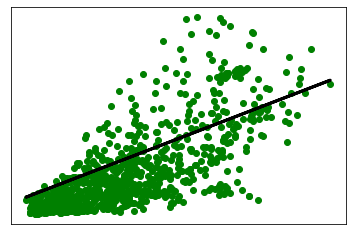

In [78]:

linear_regr = LinearRegression()
y = np.array(scaled_air_quality_df['Sofia-FDP']).reshape((-1, 1))
x = np.array(scaled_air_quality_df[[ 'Sofia-NO2']])

fdp_x_train = x[:-1000]
fdp_x_test = x[-1000:]
fdp_y_train = y[:-1000]
fdp_y_test = y[-1000:]

linear_regr.fit(fdp_x_train, fdp_y_train)
fdp_y_pred = linear_regr.predict(fdp_x_test)

# The coefficients
print("Coefficients: \n", linear_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(fdp_y_test, fdp_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(fdp_y_test, fdp_y_pred))

# Plot outputs
plt.scatter(fdp_x_test, fdp_y_test, color="green")
plt.plot(fdp_x_test, fdp_y_pred, color="black", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [[0.7549263]]
Mean squared error: 0.58
Coefficient of determination: 0.33


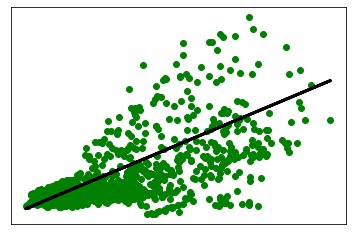

In [80]:
linear_regr = LinearRegression()
y = np.array(scaled_air_quality_df['Sofia-CO']).reshape((-1, 1))
x = np.array(scaled_air_quality_df[[ 'Sofia-NO2',]])

fdp_x_train = x[:-1000]
fdp_x_test = x[-1000:]
fdp_y_train = y[:-1000]
fdp_y_test = y[-1000:]

linear_regr.fit(fdp_x_train, fdp_y_train)
fdp_y_pred = linear_regr.predict(fdp_x_test)

# The coefficients
print("Coefficients: \n", linear_regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(fdp_y_test, fdp_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(fdp_y_test, fdp_y_pred))

# Plot outputs
plt.scatter(fdp_x_test, fdp_y_test, color="green")
plt.plot(fdp_x_test, fdp_y_pred, color="black", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

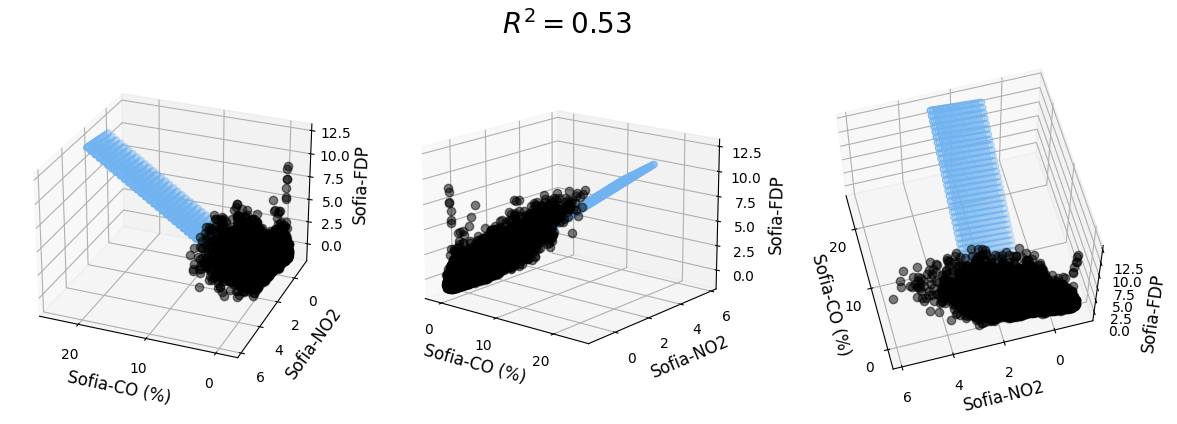

In [161]:
X = scaled_air_quality_df[['Sofia-CO', 'Sofia-NO2']].values.reshape(-1,2)
Y = scaled_air_quality_df['Sofia-FDP']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Sofia-CO (%)', fontsize=12)
    ax.set_ylabel('Sofia-NO2', fontsize=12)
    ax.set_zlabel('Sofia-FDP', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()


<AxesSubplot:>

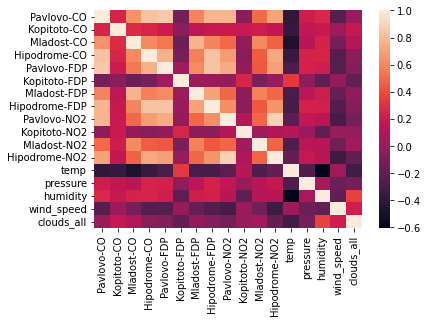

In [ ]:
corr = air_quality_df.corr()
sns.heatmap(corr)

In [ ]:
air_quality_df['weather_main'].unique()


array(['Clouds', 'Clear', 'Mist', 'Rain', 'Snow', 'Drizzle', 'Fog',
       'Smoke', 'Squall', 'Haze', 'Thunderstorm', 'Dust'], dtype=object)